# IMPORT

In [102]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split

# PREPARETION

In [2]:
# train
train = pd.read_csv('../data/train_clean.csv',
                    dtype={'floors': str,
                           'total_floors': str})
# test
test = pd.read_csv('../data/test_clean.csv',
                    dtype={'floors': str,
                           'total_floors': str})

In [3]:
train.shape

(76393, 28)

In [4]:
test.shape

(32738, 28)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76393 entries, 0 to 76392
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   page               76393 non-null  object 
 1   description        76393 non-null  object 
 2   flat_type          76393 non-null  object 
 3   object_type        76393 non-null  object 
 4   rooms              76393 non-null  object 
 5   floors             76393 non-null  object 
 6   square             76393 non-null  float64
 7   kitchen_square     40537 non-null  float64
 8   live_square        44509 non-null  float64
 9   price              76393 non-null  float64
 10  build_matireal     76393 non-null  object 
 11  public_date        76393 non-null  object 
 12  update_date        76393 non-null  object 
 13  district_rating    76393 non-null  object 
 14  district           76393 non-null  object 
 15  underground        76393 non-null  object 
 16  eco_rating         763

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32738 entries, 0 to 32737
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   page               32738 non-null  object 
 1   description        32738 non-null  object 
 2   flat_type          32738 non-null  object 
 3   object_type        32738 non-null  object 
 4   rooms              32738 non-null  object 
 5   floors             32738 non-null  object 
 6   square             32738 non-null  float64
 7   kitchen_square     17338 non-null  float64
 8   live_square        18980 non-null  float64
 9   price              32738 non-null  float64
 10  build_matireal     32738 non-null  object 
 11  public_date        32738 non-null  object 
 12  update_date        32738 non-null  object 
 13  district_rating    32738 non-null  object 
 14  district           32738 non-null  object 
 15  underground        32738 non-null  object 
 16  eco_rating         327

Для удобвства анализа объединяем тренировочные и тестовые данные, пометив где какие.

In [7]:
train['sample'] = 1 # тренировочные
test['sample'] = 0 # тестовые

df = train.append(test, sort=False).reset_index(drop=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109131 entries, 0 to 109130
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   page               109131 non-null  object 
 1   description        109131 non-null  object 
 2   flat_type          109131 non-null  object 
 3   object_type        109131 non-null  object 
 4   rooms              109131 non-null  object 
 5   floors             109131 non-null  object 
 6   square             109131 non-null  float64
 7   kitchen_square     57875 non-null   float64
 8   live_square        63489 non-null   float64
 9   price              109131 non-null  float64
 10  build_matireal     109131 non-null  object 
 11  public_date        109131 non-null  object 
 12  update_date        109131 non-null  object 
 13  district_rating    109131 non-null  object 
 14  district           109131 non-null  object 
 15  underground        109131 non-null  object 
 16  ec

# FEATURES DESCRIPTION

**price (Target)** - Цена жилого помещения. Наш таргет.

**page** - ссылка на объявление.

**description** - описание из объявления, составленное пользователем (риэлтор или собственик).

**flat_type** - тип жилого помешения.

**object_type** - тип здания, в котором находится жилое помещение.

**rooms** - количество комнат.

**floors** - этаж, на котором находится жилое помещение.

**total_floors** - общее количество этажей в доме.

**square** - общая площадь жилого помещения.

**kitchen_square** - площадь кухни.

**live_square** - жилая площадь, т.е. без учета кухни и санузла.

**build_matireal** - материал, из которого сделано здание.

**public_date** - дата публикации объявления.

**update_date** - дата последнего обновления объявления.

**district_rating** - рейтинг района, в котором находится жилое помещение.

**district** - район в котором находится жилое помещение.

**underground** - расстояние до ближайщей станции метро.

**metro_station** - ближайщая станция метро.

**eco_rating** - экологический рейтинг района.

**clear_rating** - рейтинг чистоты района.

**gkh_rating** - рейтинг ЖКХ района.

**neighbor_rating** - рейтинг соседей.

**kids_rating** - рейтинг условия для детей.

**sport_rest_rating** - рейтинг спорта и отдыха.

**shop_rating** - рейтинг магазинов.

**traffic_rating** - рейтинг транспорта.

**secure_rating** - рейтинг безопасности.

**life_price_rating** - рейтинг стоимости жизни.

**Числовые признак (4):** price, square, kitchen_square, live_square

**Категориальные признаки (24):** page, description, flat_type, object_type, rooms, floors, total_floors, build_matireal,
public_date, update_date, district_rating, district, underground, metro_station, eco_rating, clear_rating, gkh_rating,
neighbor_rating, kids_rating, sport_rest_rating, shop_rating, traffic_rating, secure_rating, life_price_rating.

In [11]:
df.describe(include=['O']).T

,count,unique,top,freq
page,109131,108574,https://www.domofond.ru/1-komnatnaya-kvartira-...,2
description,109131,90404,Светлая квартира современной планировки с полн...,818
flat_type,109131,3,Квартира,90264
object_type,109131,2,Новостройка,78146
rooms,109131,9,1,55412
floors,109131,35,2,12445
build_matireal,109131,5,Монолит,54550
public_date,109131,1277,15/2/2021,18989
update_date,109131,69,20/2/2021,14169
district_rating,109131,10,"3,7",46830


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
square,109131.0,5.534126e+01,3.807226e+01,10.0,34.4,46.0,66.7,5.000000e+03
kitchen_square,57875.0,1.373261e+01,7.710696e+00,2.0,9.0,12.4,16.6,1.000000e+02
live_square,63489.0,3.157648e+01,3.060529e+01,5.0,16.1,26.2,40.2,5.000000e+03
price,109131.0,1.012483e+07,2.927520e+07,1107000.0,5000000.0,7210000.0,11102167.0,5.446984e+09
sample,109131.0,7.000119e-01,4.582545e-01,0.0,0.0,1.0,1.0,1.000000e+00


# MISSING VALUES

In [13]:
df.isnull().sum().sort_values()

page                     0
total_floors             0
life_price_rating        0
secure_rating            0
traffic_rating           0
shop_rating              0
sport_rest_rating        0
kids_rating              0
neighbor_rating          0
gkh_rating               0
clear_rating             0
eco_rating               0
underground              0
metro_station            0
district                 0
update_date              0
public_date              0
build_matireal           0
price                    0
square                   0
floors                   0
rooms                    0
object_type              0
flat_type                0
description              0
district_rating          0
sample                   0
live_square          45642
kitchen_square       51256
dtype: int64

Все пропуски сосредоточилоись в двух признаках: `live_squzre`, `kitchen_square`. Это хорошо. Пропущена примерно половина данных, это плохо.

Есть несколько способо обработать эти пропуски:

1. Очевидные варианты:
    - заполнить средним
    - модой
    
2. Чуть более сложный способ. Посчитать, для тех данных у которых нет пропусков, какую часть от всей площади в среднем занимают жилая площадь и кухня. Взять среднее значение и на основе этого заполнить пропуски.

3. Часть объявлений это студии, в которых не указана жилая площадь и площадь кухни, так как подразумевается, что это общее пространство. Можно это значения заполнить нулями.

# OUTLINERS

In [14]:
num_features = ['square', 'kitchen_square', 'live_square']

In [15]:
def outliners_visualization(df, num_features):
    
    """ Визуализация для поиска выбросов. """
    
    for num in num_features:

        fig, ax = plt.subplots(2, figsize=(16, 12))
        fig.suptitle(num)
        
        ax[0].grid(axis='both')
        sns.scatterplot(x=df[num], y=df['price'], ax=ax[0])
        
        ax[1].grid(axis='both')
        sns.boxplot(x=df[num], ax=ax[1])
        
        plt.show()

## all data

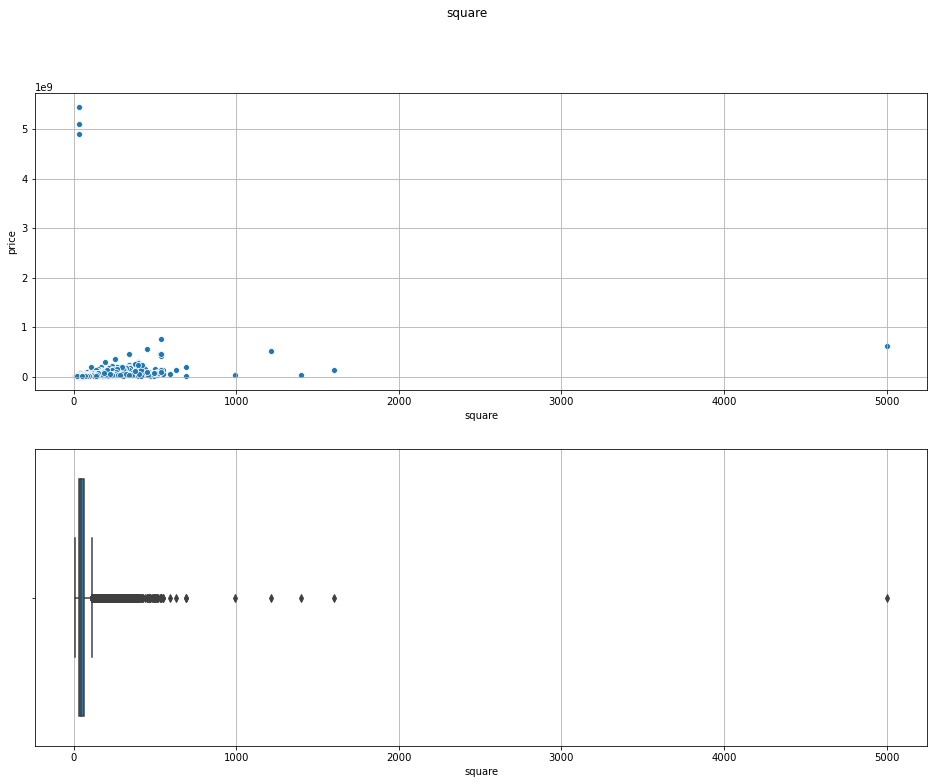

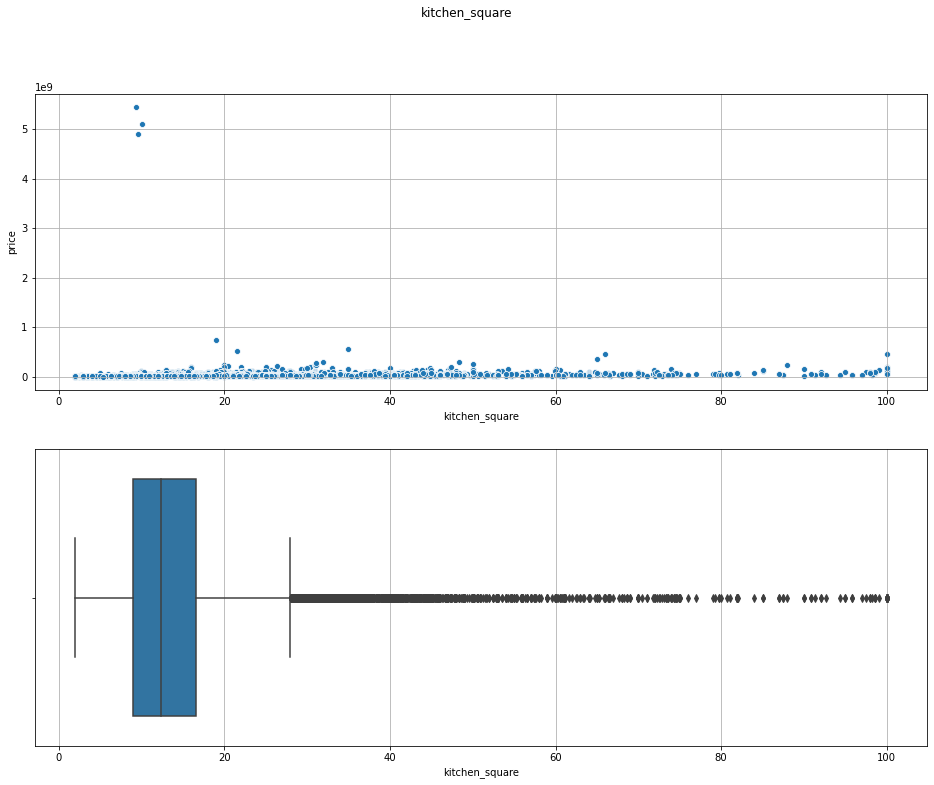

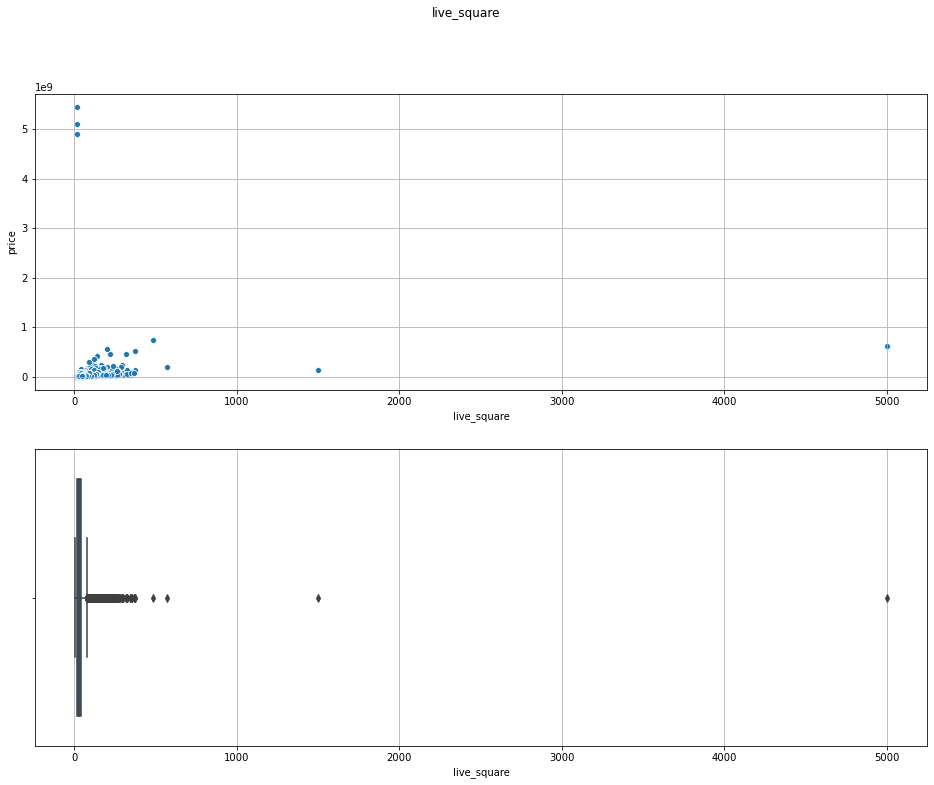

In [16]:
outliners_visualization(df, num_features)

Признак `square` по сути состоит из признаков `kitchen_square` и `live_square`. В идеале их поведение должно быть плюс\минус одинковым, но это необязательно так.

Есть явные выбросы. Точно нужно избавится от площадей больше 1000 м2. Так же есть несколько значений с маленькой площадью, но очень большой ценой. Надо взяглунуть на них отдельно.

Большая часть данных расположена примерно в интервале от 10 до 150 м2. Объявления с площадью больше 400 это совсем экзотика, очень элитное жилье или целые этажы (даже несколько) или дома. Найти закономерность для таких данных довольно сложно. Думаю лучше всего будет просто избавиться от таких данных. От 150 до 400 надо изучить подробнее и решить, что с ними делать.

In [17]:
df[df['square']>400].shape[0]

53

Всего **53** объявления. На фоне общего количества данных (> 70000) думаю можно спокойно избавиться от них.

In [44]:
df[(df['square']<50) & (df['price']>100000000)]

,page,description,flat_type,object_type,rooms,floors,square,kitchen_square,live_square,price,build_matireal,public_date,update_date,district_rating,district,underground,eco_rating,clear_rating,gkh_rating,neighbor_rating,kids_rating,sport_rest_rating,shop_rating,traffic_rating,secure_rating,life_price_rating,total_floors,metro_station,sample
13604,https://www.domofond.ru/1-komnatnaya-kvartira-...,"Прямая продажа!!!!!!, Уютная 1-комнатная квар...",Квартира,Вторичная,1,20,36.6,9.6,16.0,4.900000e+09,Монолит,10/3/2021,24/3/2021,"3,7",Выборгский,1000 - 2000,"3,4","3,2","2,9","3,7","3,8","3,5","4,3","3,2","3,4","2,5",28,Парнас,1
60667,https://www.domofond.ru/1-komnatnaya-kvartira-...,"№290619 Продается квартира ЖК «Лондон Парк», ...",Квартира,Вторичная,1,20,36.0,9.4,18.6,5.446984e+09,Кирпич,19/3/2021,24/3/2021,"3,6",Выборгский,1000 - 2000,"3,3","3,2","2,8","3,6","3,6","3,5","4,2","3,0","3,4","2,3",25,Проспект Просвещения,1
80020,https://www.domofond.ru/1-komnatnaya-kvartira-...,"№290348 г. Санкт-Петербург, Проспект Ветеранов...",Квартира,Вторичная,1,8,36.0,10.1,15.3,5.110000e+09,Монолит,15/3/2021,24/3/2021,"3,7",Красносельский,1000 - 2000,"3,4","3,2","2,9","3,7","3,8","3,5","4,3","3,2","3,4","2,5",12,Сергиево (Володарская),0


Слишком большая цена для таких параметров.

In [50]:
df['page'][(df['square']<50) & (df['price']>100000000)].loc[80020]

'https://www.domofond.ru/1-komnatnaya-kvartira-na-prodazhu-sankt_peterburg-3322026260'

Таких объявлений или уже нет или это ошибка. Их всего 3, просто удалю их.

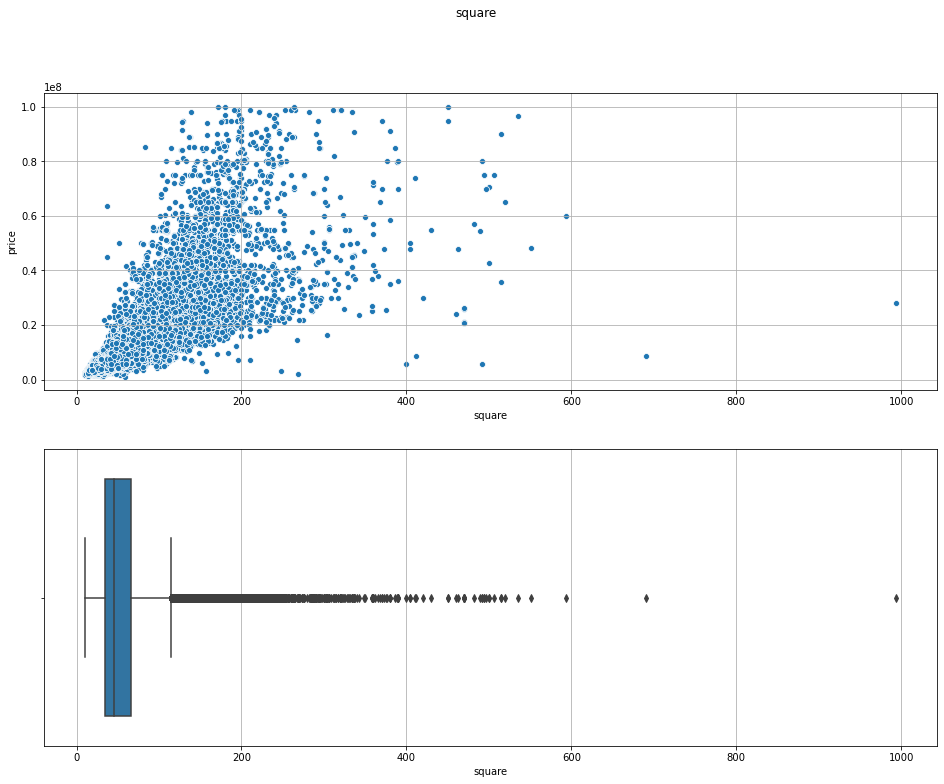

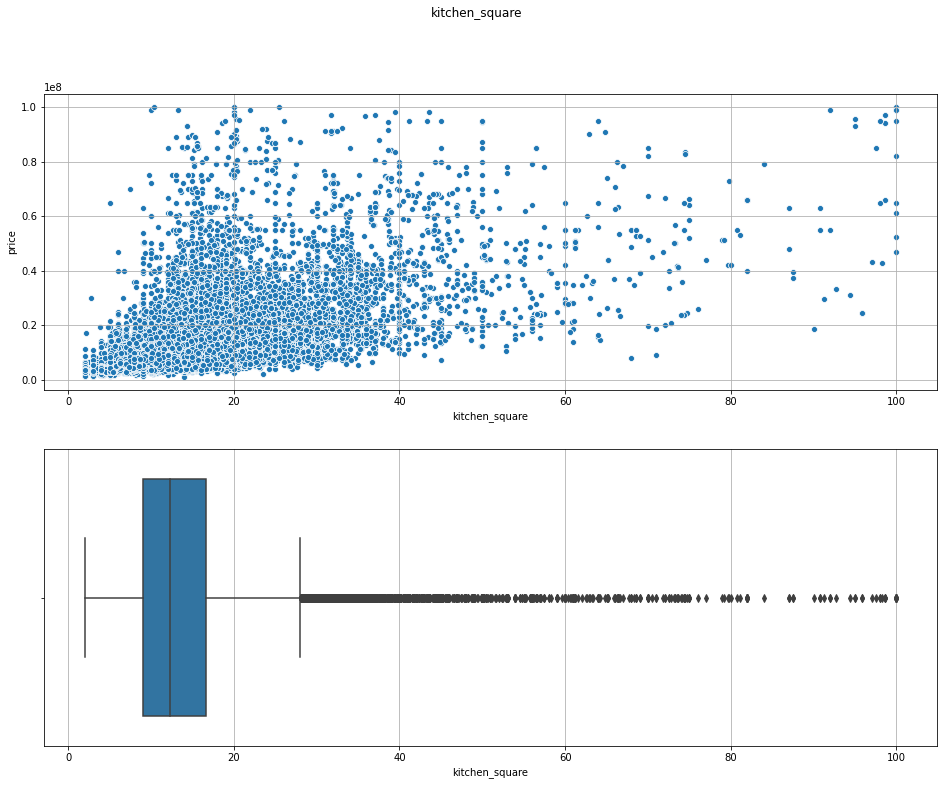

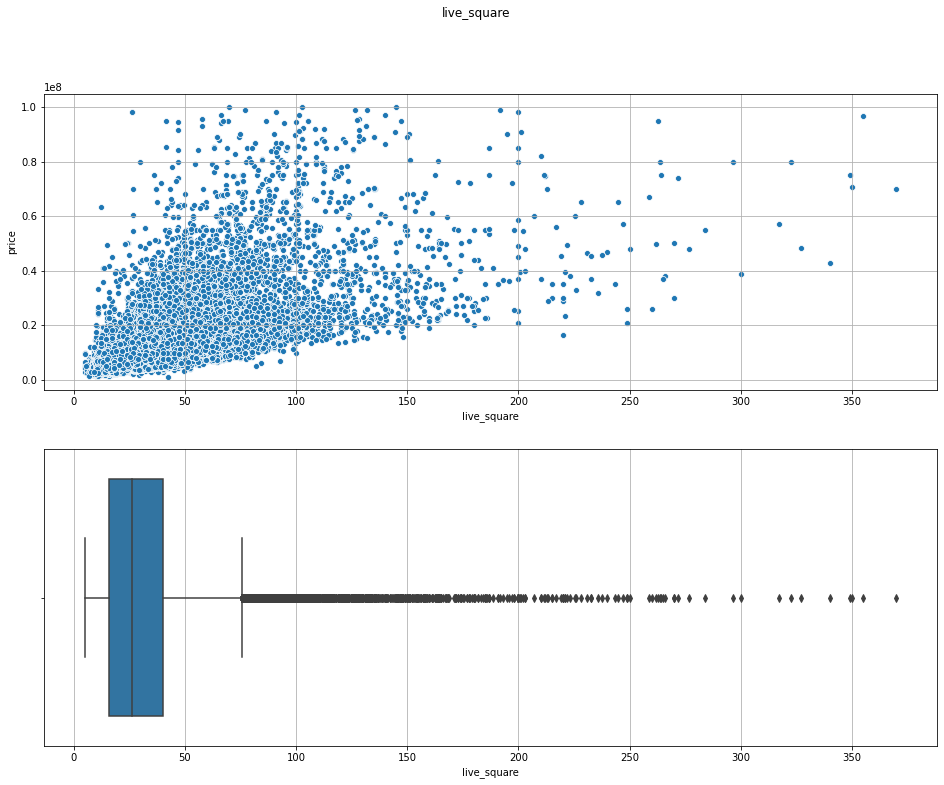

In [52]:
outliners_visualization(df[(df['square']<1000) & (df['price']<100000000)], num_features)

## < 400 m2

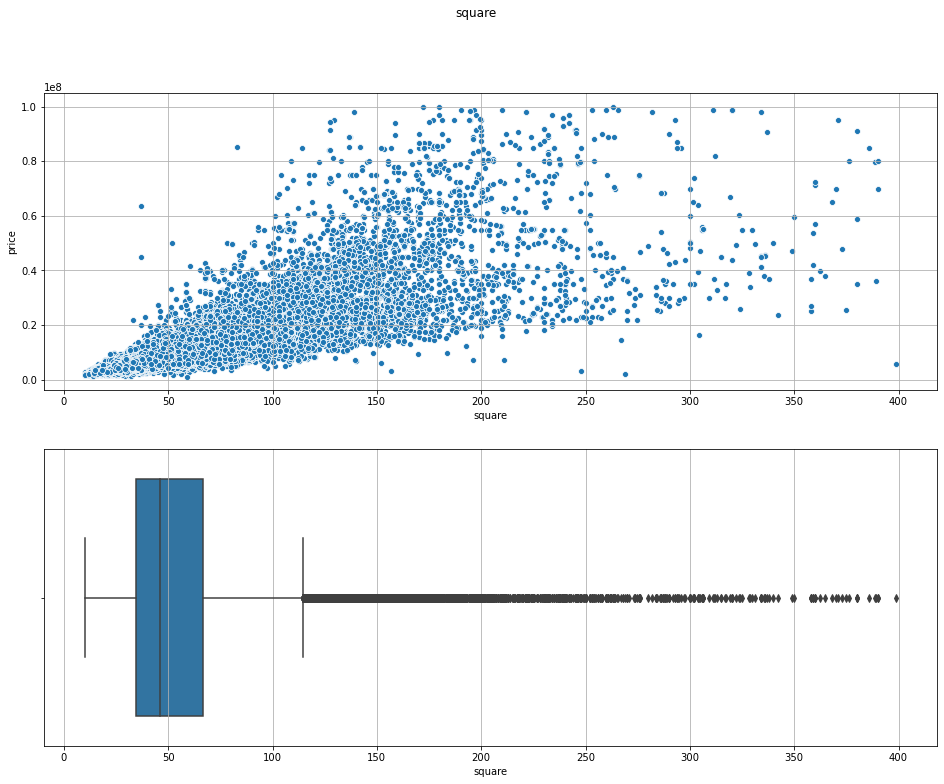

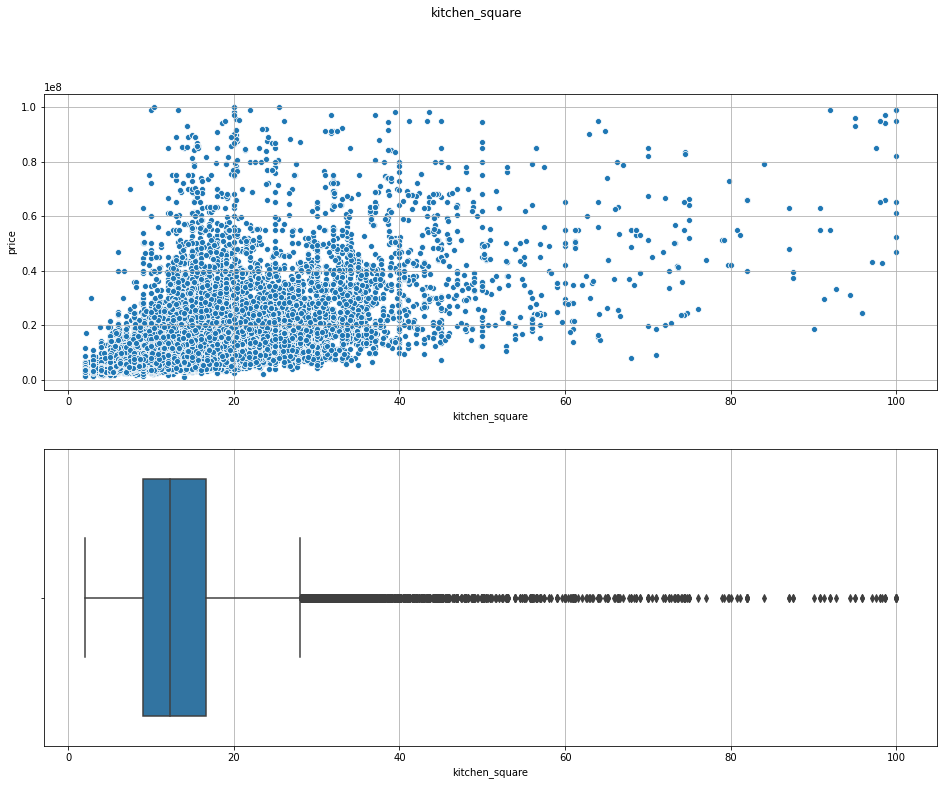

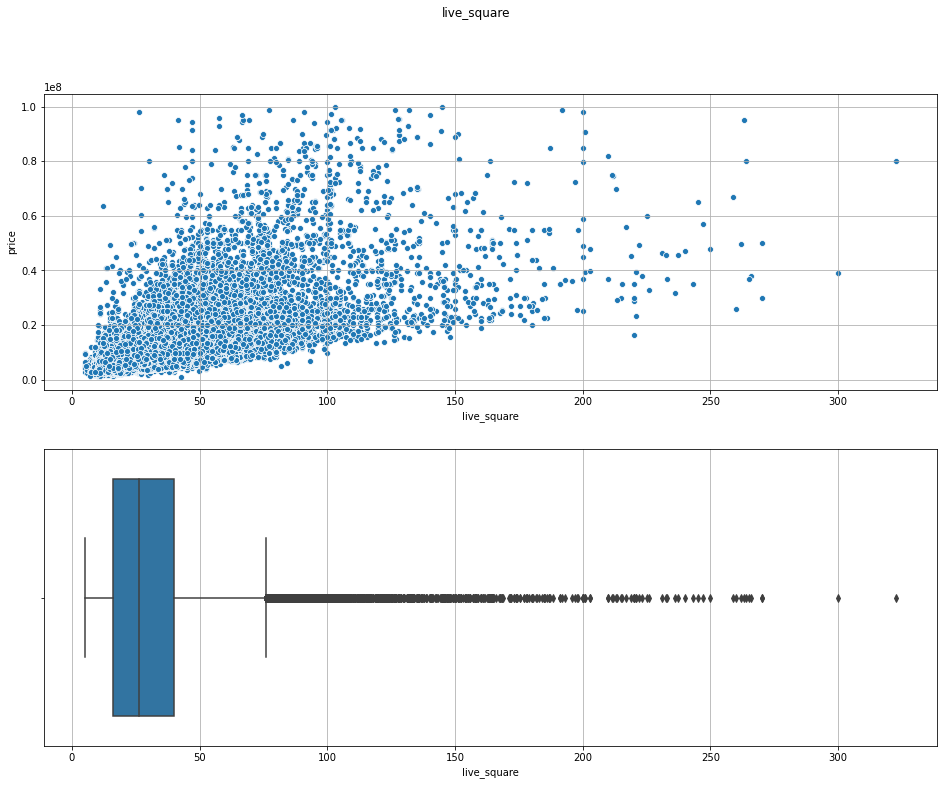

In [53]:
outliners_visualization(df[(df['square']<401) & (df['price']<100000000)], num_features)

Выглядит немного лучше, но есть что можно улучшить.

## < 130 m2

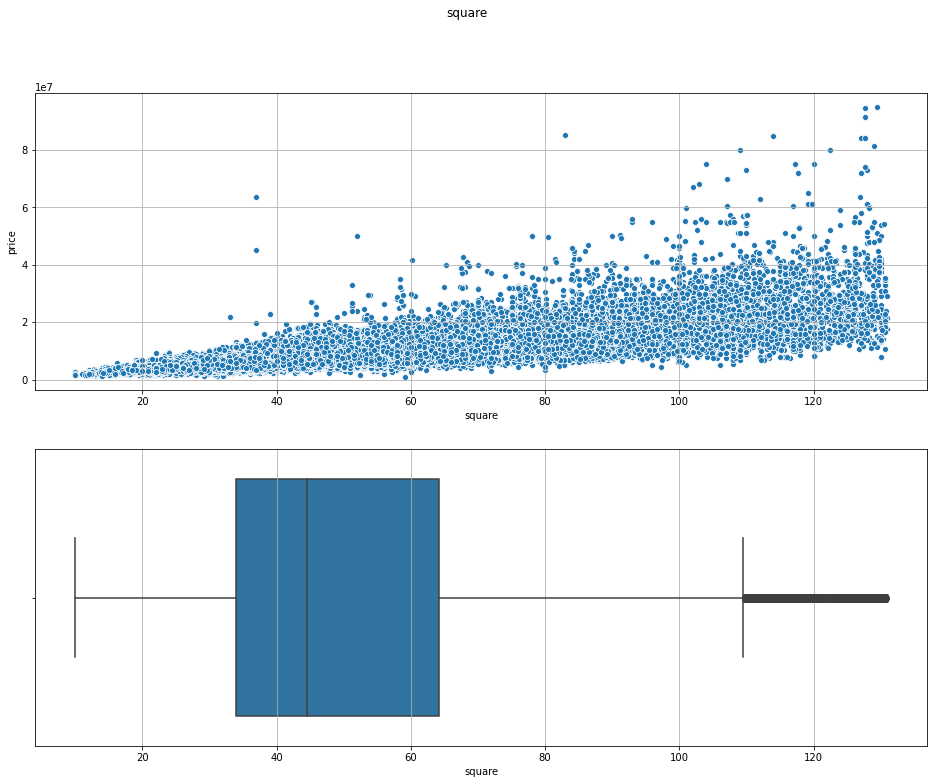

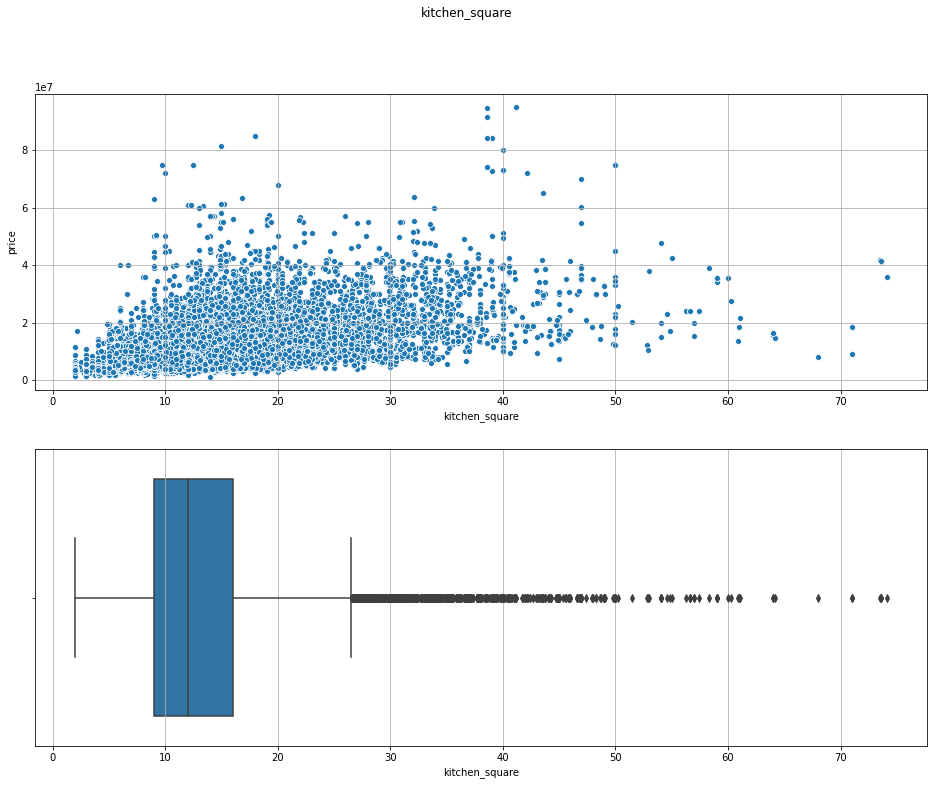

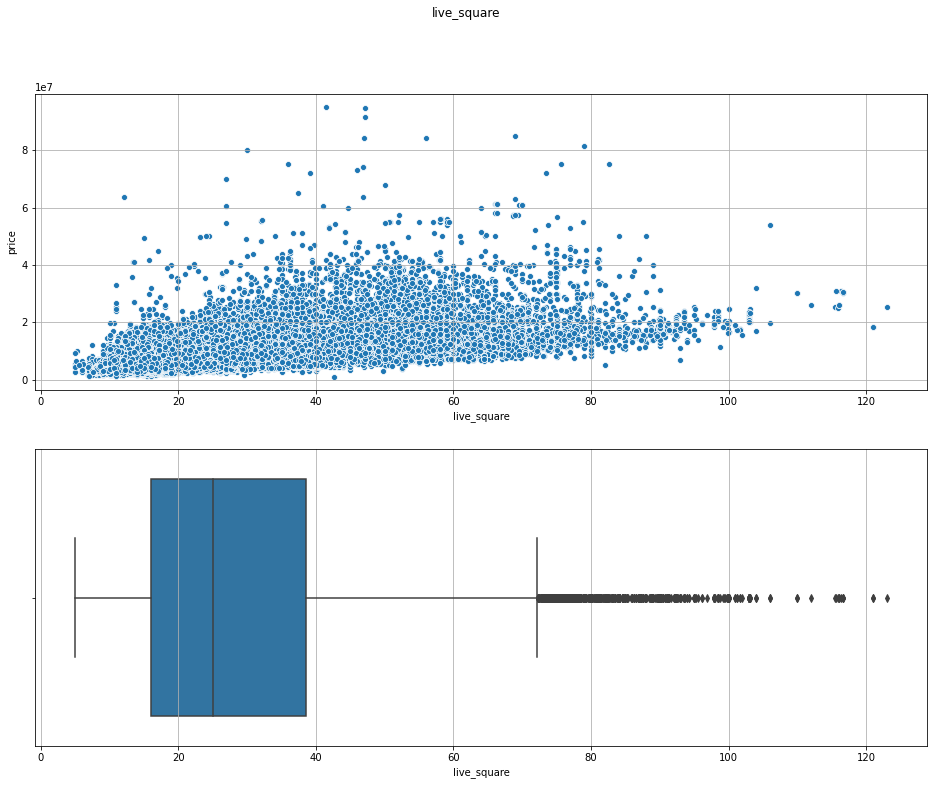

In [54]:
outliners_visualization(df[(df['square']<131) & (df['price']<100000000)], num_features)

In [55]:
df[df['square']>130].shape[0]

3751

Объявления до 130 м2 выглядят очень хорошо, если смотреть на общую площадь. Есть небольшое количество значений похожих на выбросы. При построении моделей нужно попробовать разные варианты обработки выбросов. Поробовать взять разные диапазоны допустимых значений.

# DISTRIBUTION

In [21]:
def num_visualization(df, num_features):
    
    """ Строит distplot (seaborn) для всех числовых признаков. """
    
    for num in num_features:
        
        fig = plt.figure(figsize=(12, 5))
        fig.suptitle(num)
        
        plt.grid(axis='both')
        plt.axvline(x = df[num].mean(), c = 'red') # среднее значение
        plt.axvline(x = df[num].median(), c = 'green') # медиана
        sns.distplot(df[num], fit=norm)
    
        dark_line = mlines.Line2D([], [], color='black', label='norm. dist.')
        grean_line = mlines.Line2D([], [], color='green', label='median')
        red_line = mlines.Line2D([], [], color='red', label='mean')
        plt.legend(handles=[dark_line, grean_line, red_line])
        
        plt.show()
        
        print(f'Kurtosis: {df[num].kurtosis()}')
        print(f'Skewness: {df[num].skew()}')

## all data

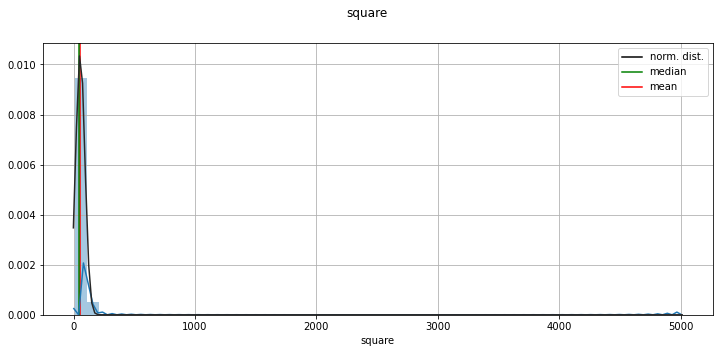

Kurtosis: 2672.1205997006196
Skewness: 23.893958166780823


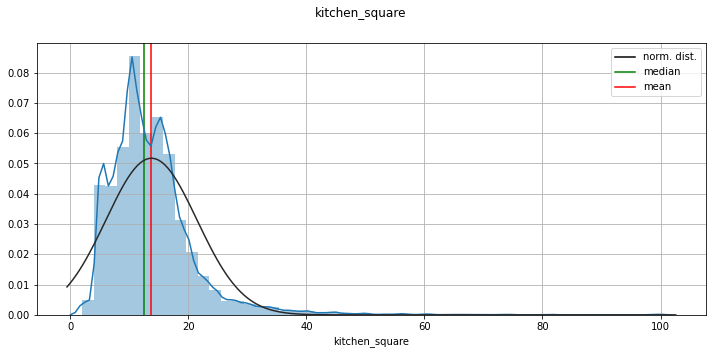

Kurtosis: 19.091829179949563
Skewness: 2.994401180699639


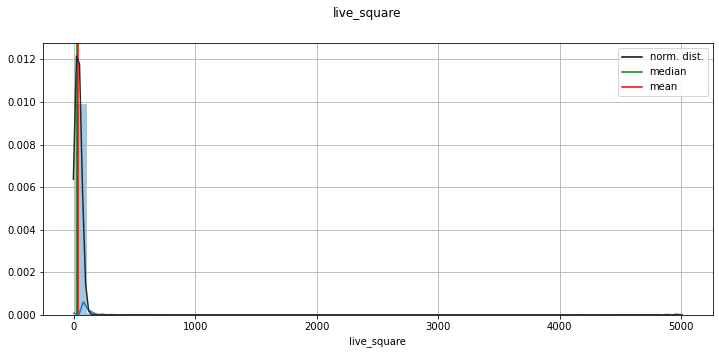

Kurtosis: 11030.195750798397
Skewness: 70.4985980960391


In [56]:
num_visualization(df, num_features)

## < 400 m2

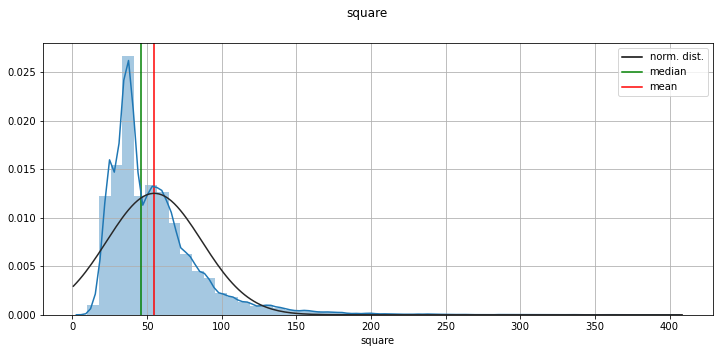

Kurtosis: 10.565465601341415
Skewness: 2.423939054568509


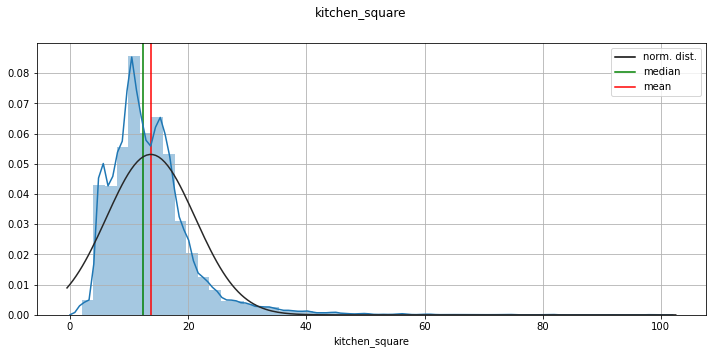

Kurtosis: 17.031033948611466
Skewness: 2.7935563911762737


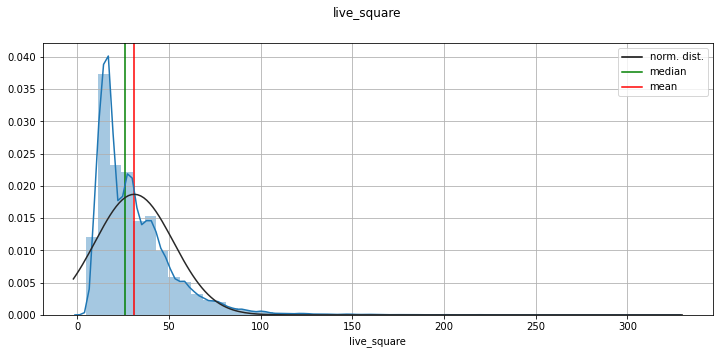

Kurtosis: 12.490399787410603
Skewness: 2.513553213393068


In [58]:
num_visualization(df[(df['square']<401) & (df['price']<100000000)], num_features)

## < 130 m2

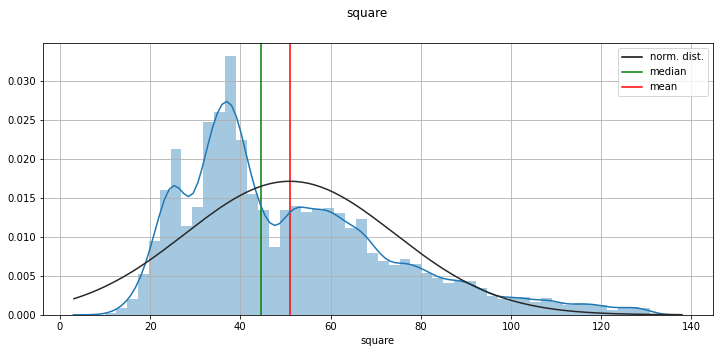

Kurtosis: 0.5602060011027001
Skewness: 0.9673580649707813


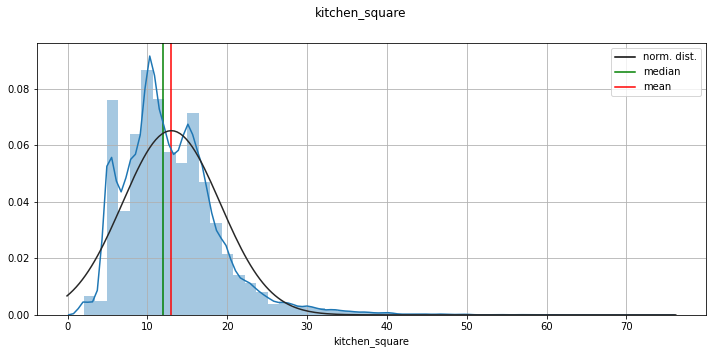

Kurtosis: 5.57236961965898
Skewness: 1.5274489084111182


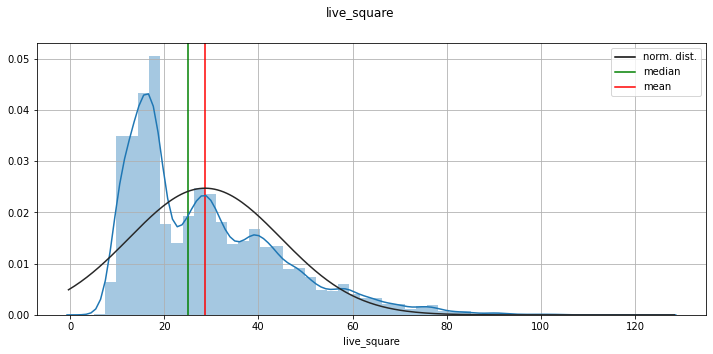

Kurtosis: 1.2164258768315244
Skewness: 1.1502674470907603


In [59]:
num_visualization(df[(df['square']<131) & (df['price']<100000000)], num_features)

Все распределения бимодальные, с хвостами смещенными вправо.

Попробуем взяглунать на студии и квартиры отдельно друг от друга.

## Студии

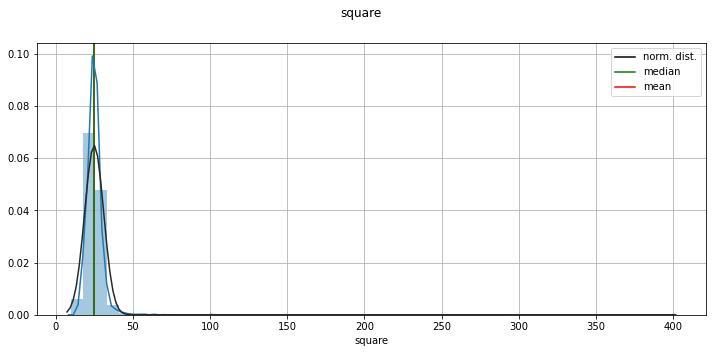

Kurtosis: 860.1588060377787
Skewness: 17.107177689150205


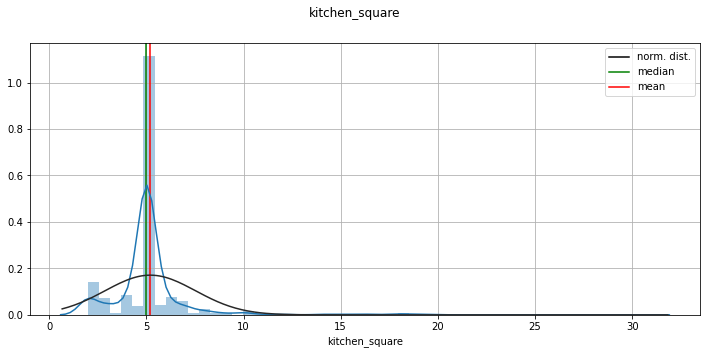

Kurtosis: 23.500862073072305
Skewness: 3.902521490512363


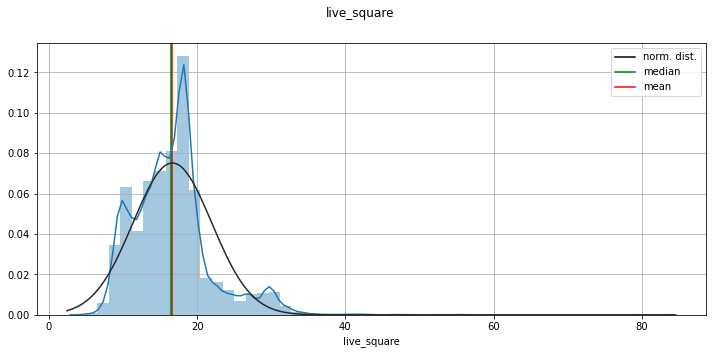

Kurtosis: 5.382704892139129
Skewness: 1.3121817188211613


In [62]:
num_visualization(df[(df['square']<1000) & (df['price']<100000000) & (df['flat_type']=='Студия')], num_features)

### < 130 m2

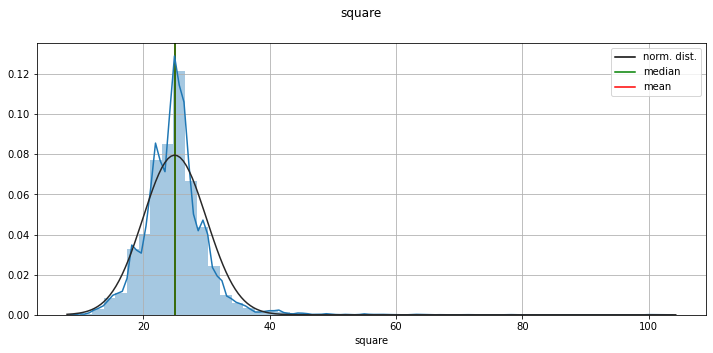

Kurtosis: 21.280550784927406
Skewness: 2.1469074191273316


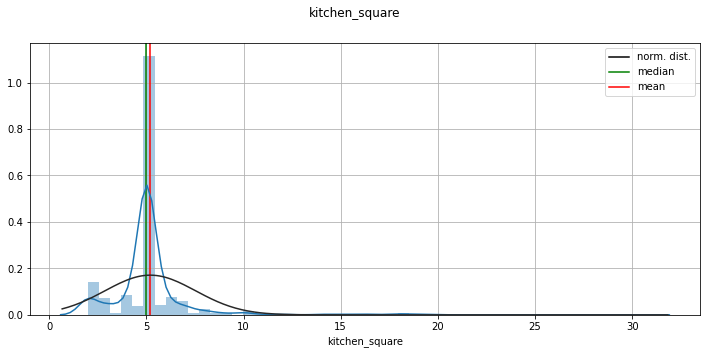

Kurtosis: 23.500862073072305
Skewness: 3.9025214905123624


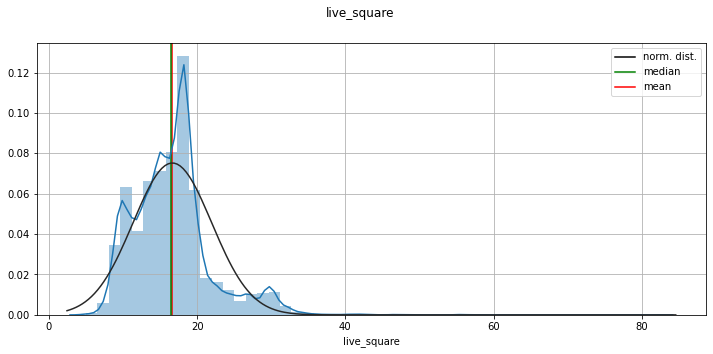

Kurtosis: 5.387139290771097
Skewness: 1.3124581362217072


In [63]:
num_visualization(df[(df['square']<131) & (df['price']<100000000) & (df['flat_type']=='Студия')], num_features)

## Квартиры

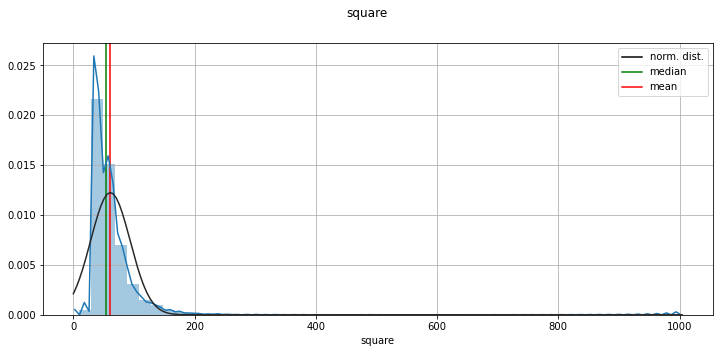

Kurtosis: 28.270685683187565
Skewness: 3.3827352843514014


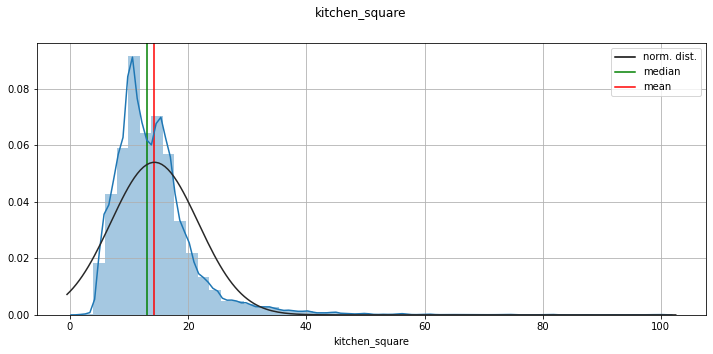

Kurtosis: 19.074204192601634
Skewness: 3.0531515596720897


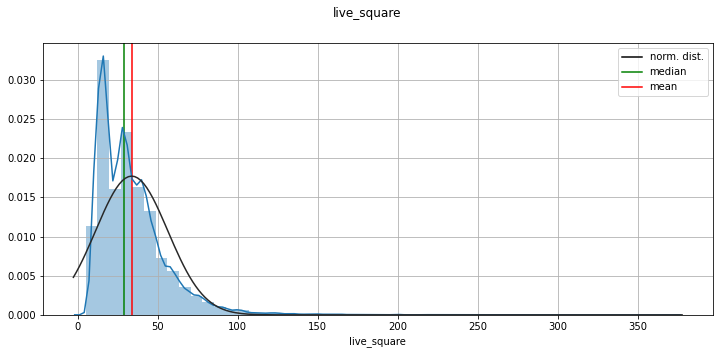

Kurtosis: 16.999235488453753
Skewness: 2.7525300847265104


In [64]:
num_visualization(df[(df['square']<1000) & (df['price']<100000000) & (df['flat_type']=='Квартира')], num_features)

### < 130 m2

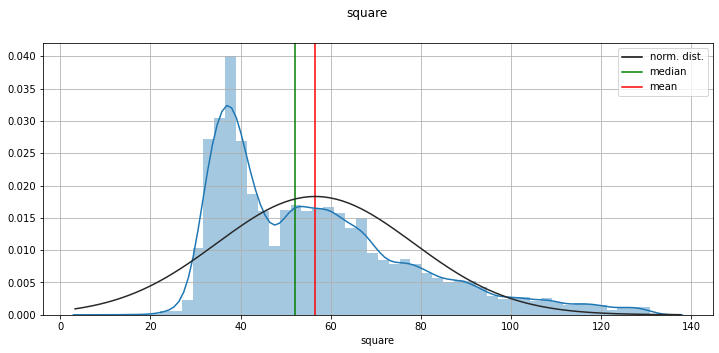

Kurtosis: 0.6219405845220827
Skewness: 1.043709752420396


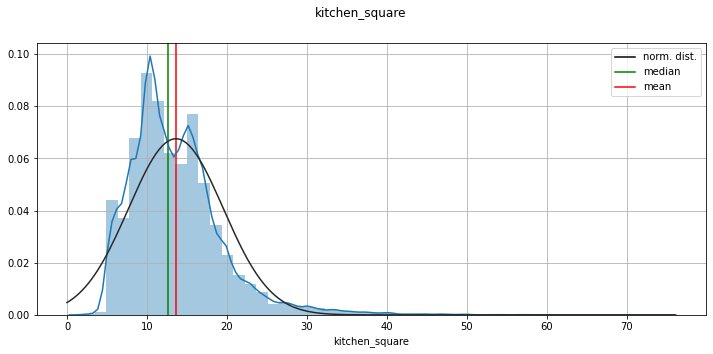

Kurtosis: 6.586765112670898
Skewness: 1.7317694542836004


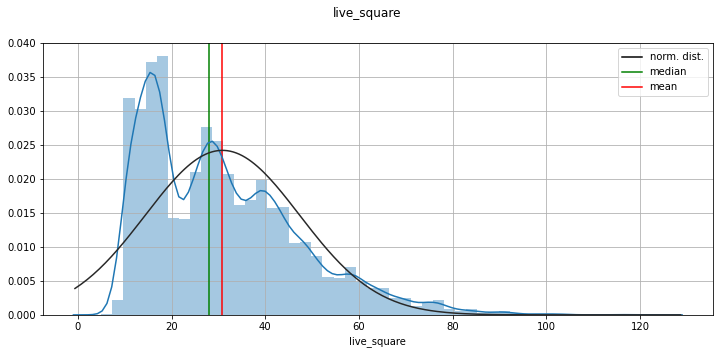

Kurtosis: 0.8518592261712565
Skewness: 0.9795377895217441


In [65]:
num_visualization(df[(df['square']<131) & (df['price']<100000000) & (df['flat_type']=='Квартира')], num_features)

## Fill NaN

Попробуем сделать следующее: добавлю два новых числовых признака `kitchen_part` и `live_part`. Эти признаки показывают какую долю занимает кухня и жилая площадь от всей площади. Посмотрю среднее значение этих признаков и на основе этого попробую заполнить пропуски и посмотрю, что получится.

In [29]:
def add_new_features(df):
    
    """ Добавляет новые признаки. """

    temp_df = df.copy()

#   Доля кухни от всей площади. Понадобится для заполнения пропусков.
    temp_df['kitchen_part'] = 0
    temp_df['kitchen_part'] = (np.round(temp_df['kitchen_square'] / temp_df['square'], 2))
    
#   Доля жилой площади от всей площади. Понадобится для заполнения пропусков.
    temp_df['live_part'] = 0
    temp_df['live_part'] = (np.round(temp_df['live_square'] / temp_df['square'], 2))

    return temp_df

In [30]:
df_fillna = add_new_features(df)

In [31]:
df_fillna['kitchen_part'].describe().T

count    57875.000000
mean         0.246506
std          0.105416
min          0.010000
25%          0.170000
50%          0.230000
75%          0.300000
max          1.000000
Name: kitchen_part, dtype: float64

In [32]:
df_fillna['live_part'].describe().T

count    63489.000000
mean         0.548964
std          0.178678
min          0.050000
25%          0.430000
50%          0.520000
75%          0.640000
max          1.000000
Name: live_part, dtype: float64

In [33]:
df_fillna['kitchen_square'][df_fillna['kitchen_square'].isna()] = df_fillna['square'][df_fillna['kitchen_square'].isna()].apply(lambda x: x*0.24)

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_fillna['live_square'][df_fillna['live_square'].isna()] = df_fillna['square'][df_fillna['live_square'].isna()].apply(lambda x: x*0.55)

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Студии

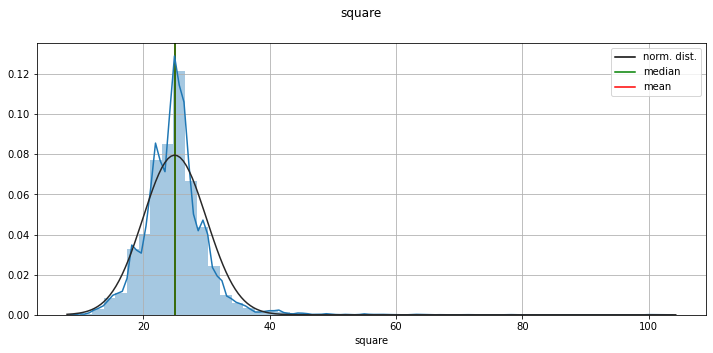

Kurtosis: 21.280550784927406
Skewness: 2.1469074191273316


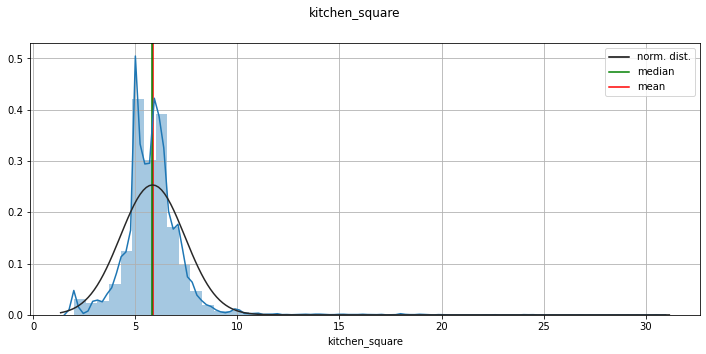

Kurtosis: 28.349794810563335
Skewness: 3.113887005317589


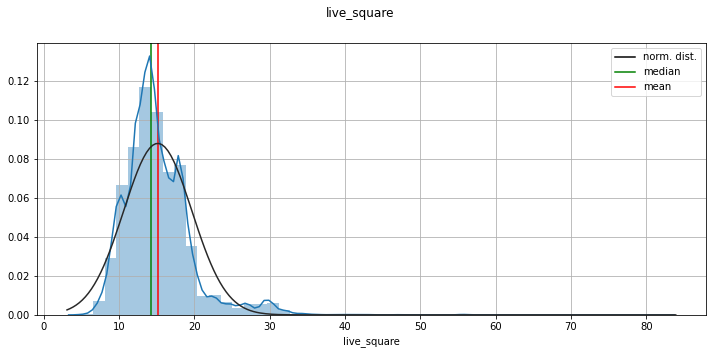

Kurtosis: 8.933481036648963
Skewness: 1.868780111816936


In [35]:
num_visualization(df_fillna[(df_fillna['flat_type']=='Студия') & (df_fillna['square']<131)], num_features)

### Квартиры

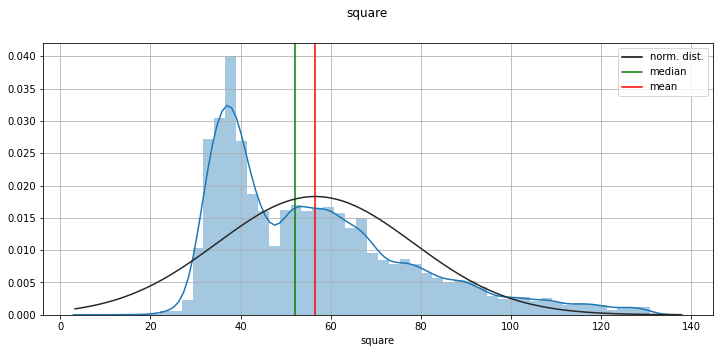

Kurtosis: 0.621846257643373
Skewness: 1.0437317790699006


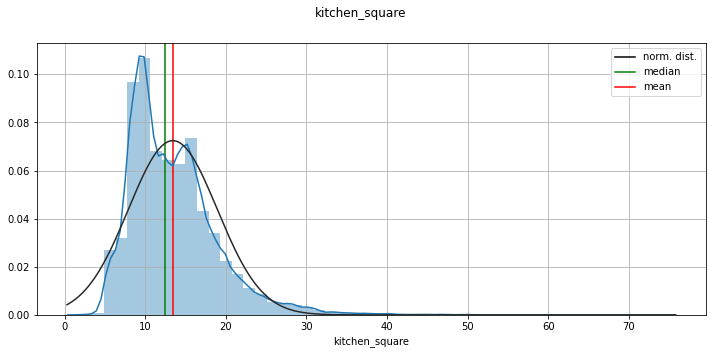

Kurtosis: 5.5551506006537625
Skewness: 1.5896577351563992


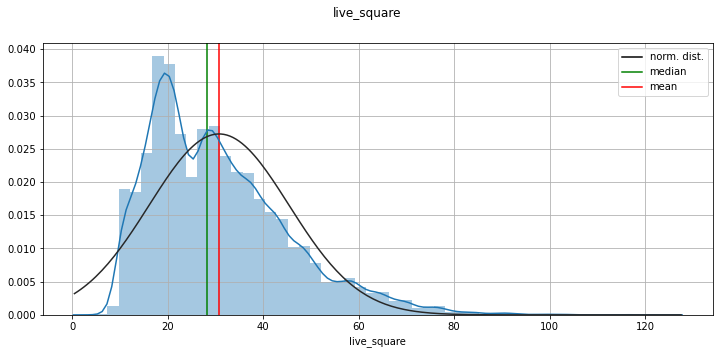

Kurtosis: 1.2540949484973525
Skewness: 1.0445622988498815


In [36]:
num_visualization(df_fillna[(df_fillna['flat_type']=='Квартира') & (df_fillna['square']<131)], num_features)

При построении регресионной модели нужно будет стандартизировать данные.

# CORRELATION

## all data

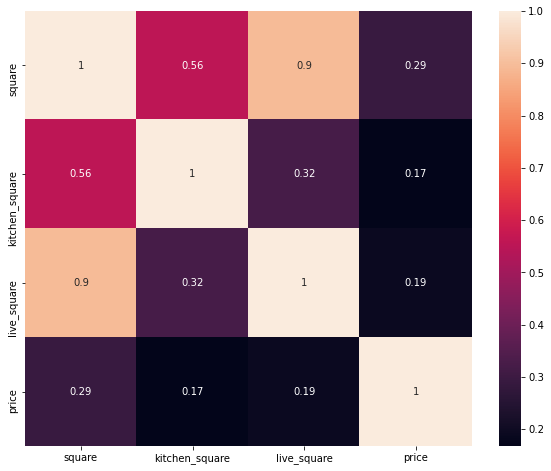

In [83]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df[['square', 'kitchen_square', 'live_square', 'price']].corr(), annot=True)
plt.show()

## < 400 m2

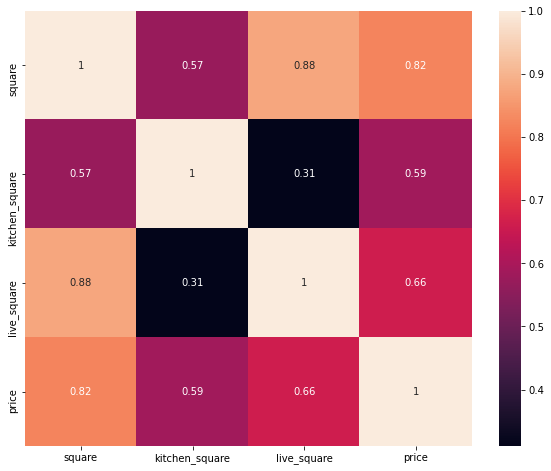

In [84]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df[['square', 'kitchen_square', 'live_square', 'price']][(df['square']<401) & (df['price']<100000000)].corr(), annot=True)
plt.show()

## < 130 m2

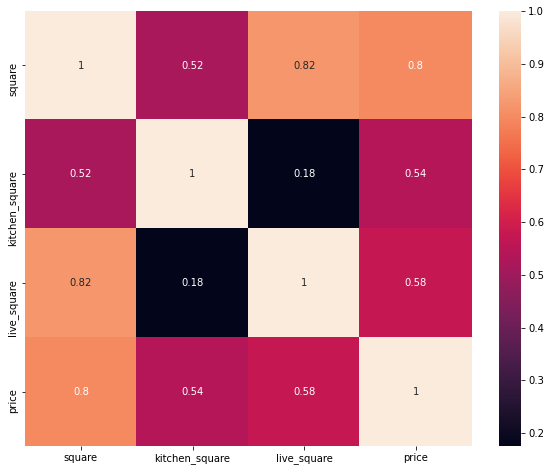

In [85]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df[['square', 'kitchen_square', 'live_square', 'price']][(df['square']<131) & (df['price']<100000000)].corr(), annot=True)
plt.show()

**Отсекаем явные выбросы и корреляция между признаками и таргетом значительно увеличивается.**

**Промежуточный вывод**:

Если рассматривать максимально доступные объявления (не премиум класса), то в целом данные достаточно хорошие. При моделировании нужно попробвать разные варианты заполнения пропусков и обработки выбросов. Признаки `kitchen_square` и `live_square` для студий и квартир стоит обработать отдельно друг от друга.

Отдельно все же стоит попробовать построить модели с учетом жилья премимум класса, возможно получиться понять где модель ошибается и как это можно исправить.

# PROBABILITY

## all data

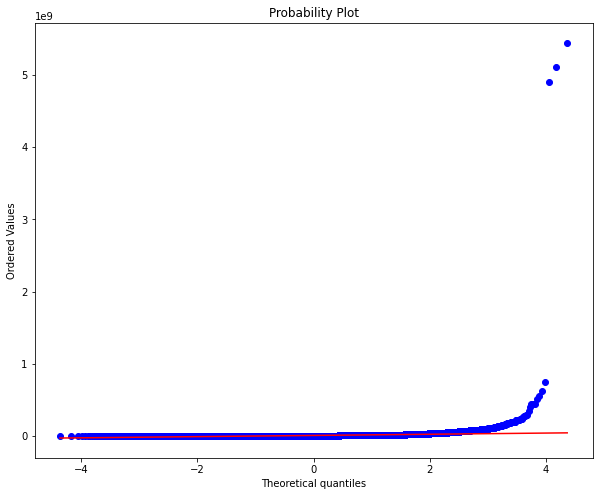

In [93]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(df['price'], plot=plt)

## < 400 m2

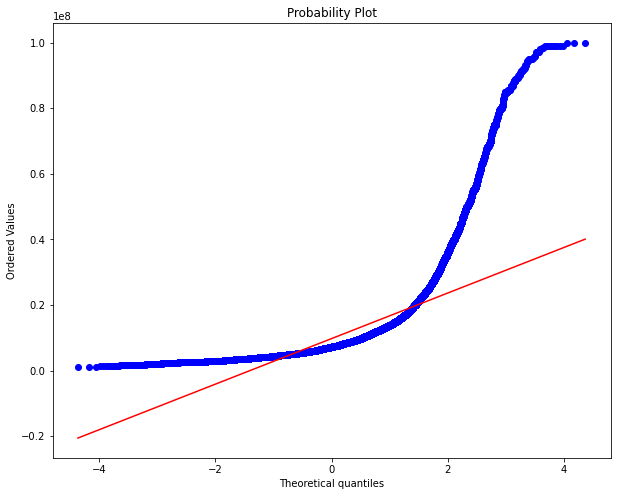

In [94]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(df['price'][(df['square']<401) & (df['price']<100000000)], plot=plt)

## < 400 m2 (log1p)

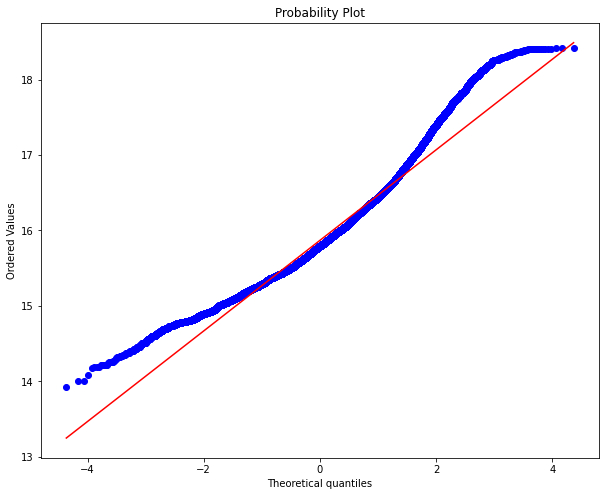

In [95]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(np.log1p(df['price'][(df['square']<401) & (df['price']<100000000)]), plot=plt)

## <130 m2

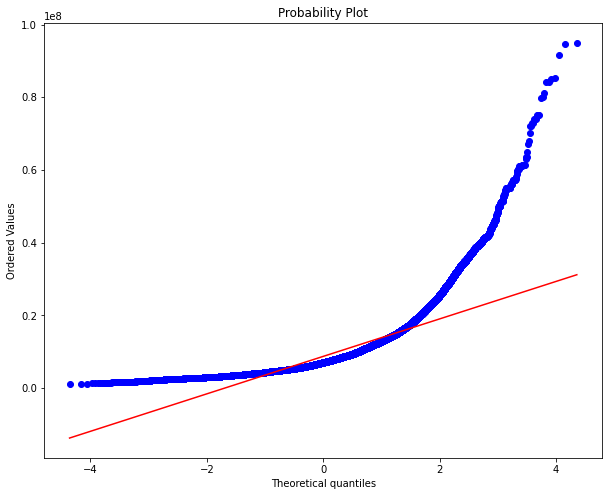

In [96]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(df['price'][(df['square']<131) & (df['price']<100000000)], plot=plt)

## < 130 m2 (log1p)

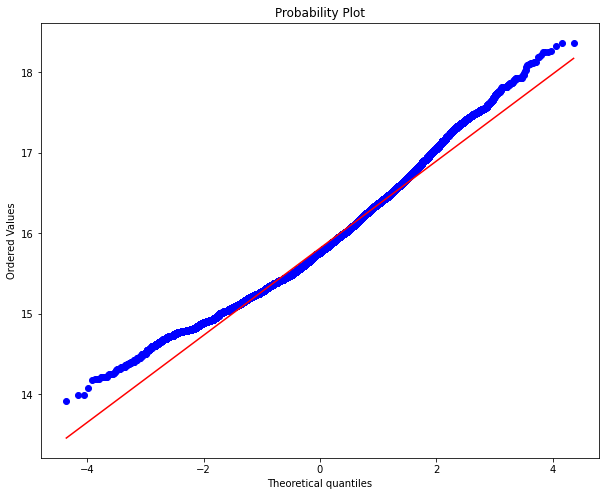

In [97]:
fig = plt.figure(figsize=(10,8))
res = stats.probplot(np.log1p(df['price'][(df['square']<131) & (df['price']<100000000)]), plot=plt)

Лучше всего выглядят объявления до 130 м2. Перед построением регресионной модели нужно будет стандартизировать данные.

# CATEGORICAL VISUALIZATION

In [37]:
cat_features = ['flat_type', 'object_type', 'rooms', 'floors',
                'build_matireal', 'district_rating', 'district', 'eco_rating', 'clear_rating',
                'gkh_rating', 'neighbor_rating', 'kids_rating', 'sport_rest_rating',
                'shop_rating', 'traffic_rating', 'secure_rating', 'life_price_rating',
                'total_floors', 'metro_station', 'underground'] 

## countplot

In [38]:
def cat_visualization(df, cat_features):
    
    """ 
    
    Строит countplot (seaborn) для всех категриальных признаков, 
    для train и test выборки.
    
    """

    # Количество признаков
    num_of_features = len(cat_features)

    for cat in cat_features:
        
        print(cat.upper()+'\n')
        
        for i in range(df[cat].nunique()):
            print('{}: {} / {}%'.format(df[cat].unique()[i],
                                        df[cat][df[cat] == df[cat].unique()[i]].count(),
                                        round((df[cat][df[cat] == df[cat].unique()[i]].count()*100)/df.shape[0], 2)))

        fig = plt.figure(figsize=(16, 8))
        
        if df[cat].nunique() > 10:
            plt.tick_params(axis='x', rotation=90)
            
        plt.grid(axis='both')
        sns.countplot(df[cat], order=df[cat].value_counts().index)
        
        plt.show()

FLAT_TYPE

Квартира: 90264 / 82.71%
Студия: 18693 / 17.13%
Своб. планировка: 174 / 0.16%


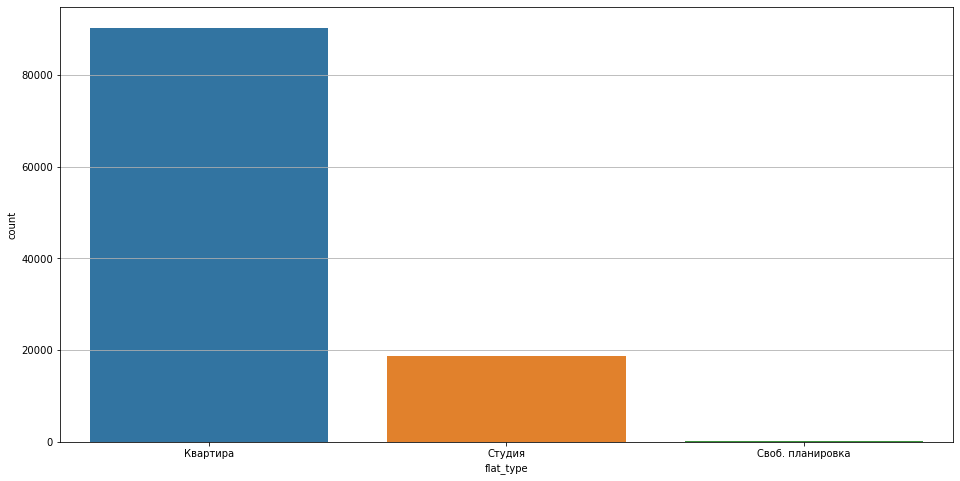

OBJECT_TYPE

Новостройка: 78146 / 71.61%
Вторичная: 30985 / 28.39%


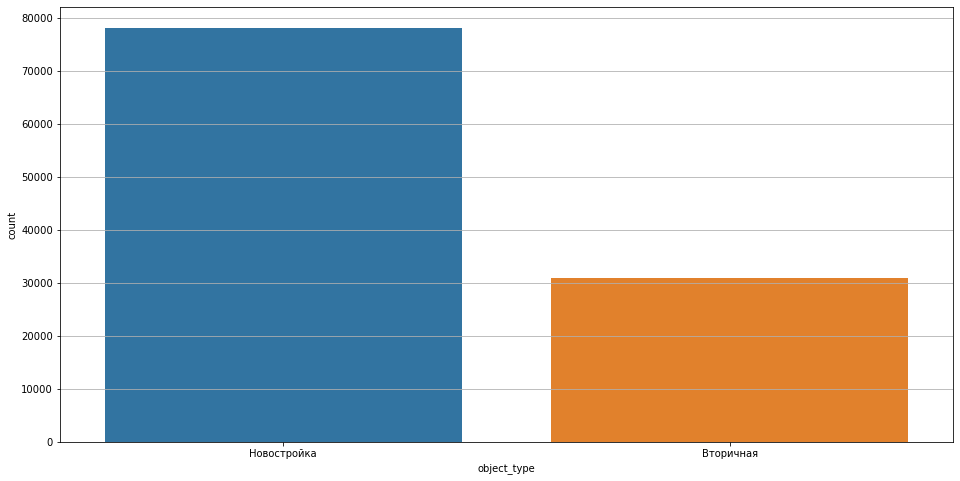

ROOMS

1: 55412 / 50.78%
2: 30909 / 28.32%
5: 900 / 0.82%
3: 18185 / 16.66%
4: 3326 / 3.05%
7: 101 / 0.09%
9: 71 / 0.07%
8: 53 / 0.05%
Своб. планировка: 174 / 0.16%


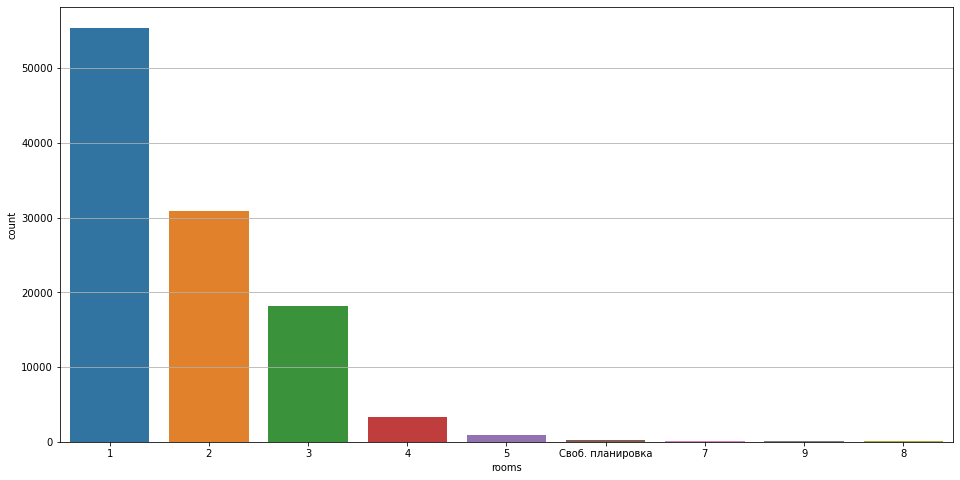

FLOORS

2: 12445 / 11.4%
11: 4665 / 4.27%
12: 4483 / 4.11%
5: 8868 / 8.13%
3: 10063 / 9.22%
1: 6642 / 6.09%
16: 2184 / 2.0%
4: 9384 / 8.6%
8: 6678 / 6.12%
7: 6893 / 6.32%
6: 7020 / 6.43%
9: 5574 / 5.11%
14: 2843 / 2.61%
15: 2476 / 2.27%
19: 1382 / 1.27%
13: 3535 / 3.24%
18: 1651 / 1.51%
23: 827 / 0.76%
25: 337 / 0.31%
10: 5102 / 4.68%
22: 934 / 0.86%
21: 968 / 0.89%
17: 1961 / 1.8%
20: 1324 / 1.21%
24: 753 / 0.69%
26: 70 / 0.06%
34: 2 / 0.0%
27: 37 / 0.03%
29: 3 / 0.0%
28: 17 / 0.02%
30: 2 / 0.0%
32: 4 / 0.0%
35: 1 / 0.0%
31: 1 / 0.0%
33: 2 / 0.0%


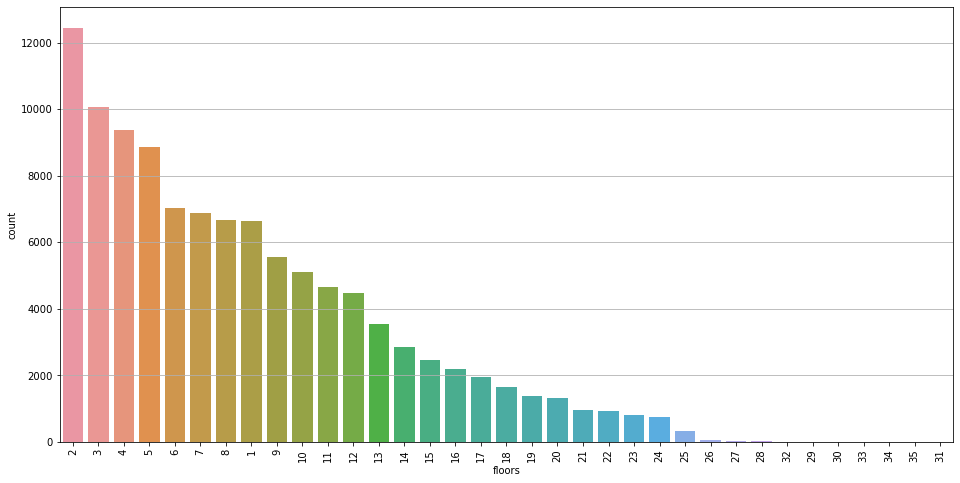

BUILD_MATIREAL

Панель: 12632 / 11.58%
Кирпич: 41468 / 38.0%
Монолит: 54550 / 49.99%
Блоки: 458 / 0.42%
Дерево: 23 / 0.02%


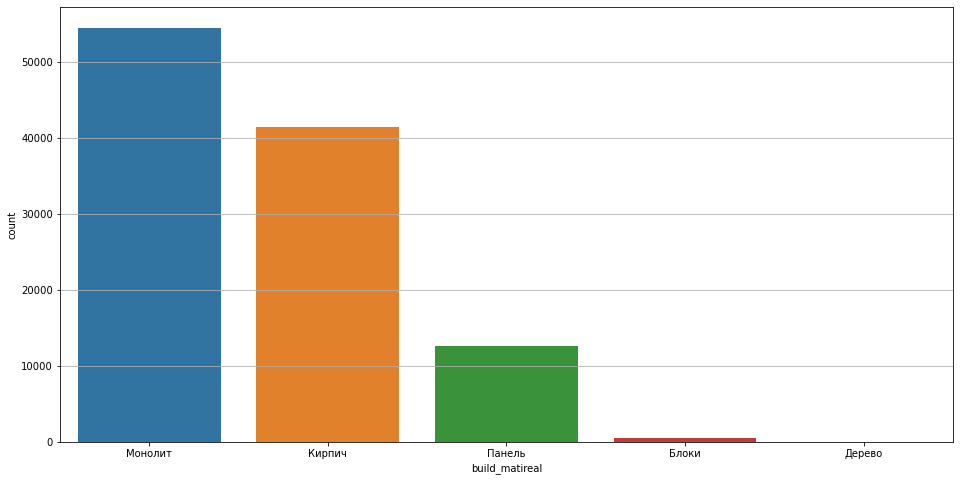

DISTRICT_RATING

3,5: 5230 / 4.79%
3,7: 46830 / 42.91%
3,9: 12358 / 11.32%
3,2: 5528 / 5.07%
3,8: 15681 / 14.37%
4,0: 10419 / 9.55%
3,4: 2387 / 2.19%
3,6: 5564 / 5.1%
3,3: 2605 / 2.39%
4,1: 2529 / 2.32%


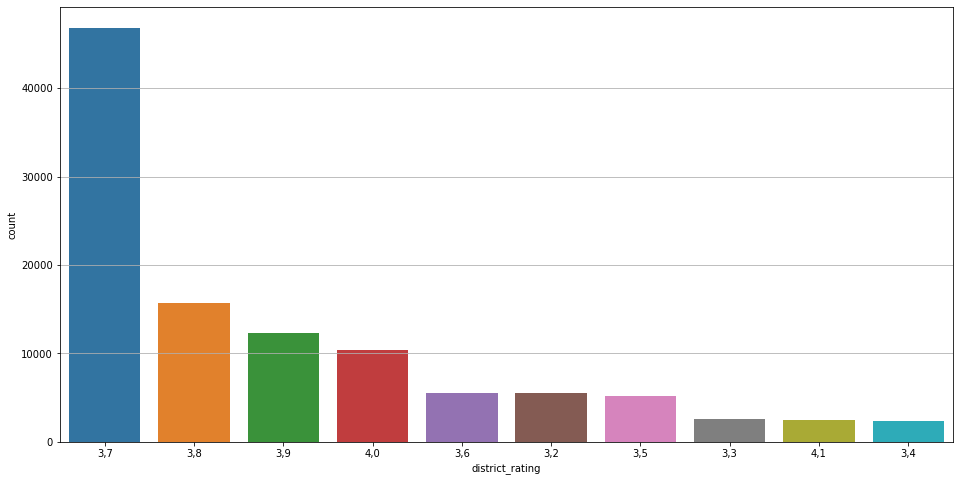

DISTRICT

Невский: 13656 / 12.51%
Адмиралтейский: 4205 / 3.85%
Приморский: 17627 / 16.15%
Петроградский: 4777 / 4.38%
Калининский: 10980 / 10.06%
Пушкинский: 1846 / 1.69%
Московский: 11183 / 10.25%
Выборгский: 18257 / 16.73%
Центральный: 3081 / 2.82%
Красногвардейский: 3406 / 3.12%
Красносельский: 7231 / 6.63%
Ваcилеостровский: 5286 / 4.84%
Кировский: 2597 / 2.38%
Санкт-Петербург: 1351 / 1.24%
Фрунзенский: 2014 / 1.85%
Колпинский: 1176 / 1.08%
Всеволожский: 214 / 0.2%
Петродворцовый: 244 / 0.22%


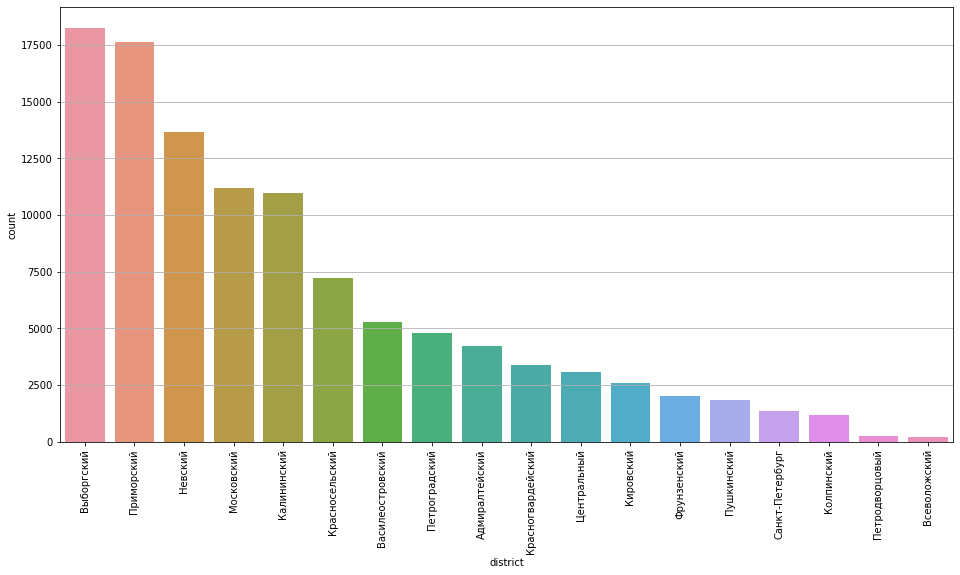

ECO_RATING

3,1: 11144 / 10.21%
3,4: 41802 / 38.3%
3,3: 7359 / 6.74%
3,5: 4628 / 4.24%
2,8: 6170 / 5.65%
3,2: 9035 / 8.28%
2,4: 2080 / 1.91%
3,7: 10707 / 9.81%
2,6: 699 / 0.64%
2,3: 1245 / 1.14%
4,4: 1127 / 1.03%
3,6: 4493 / 4.12%
2,9: 3076 / 2.82%
4,0: 1729 / 1.58%
3,8: 2880 / 2.64%
3,9: 708 / 0.65%
4,2: 249 / 0.23%


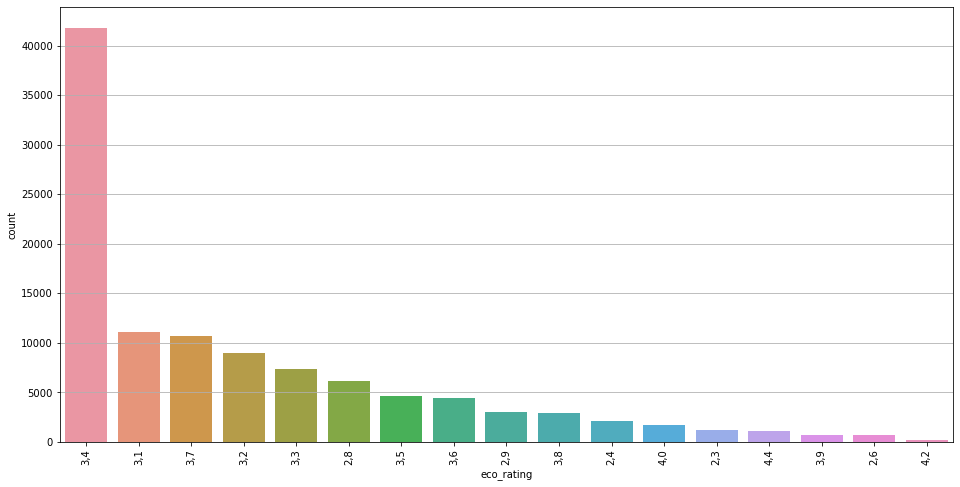

CLEAR_RATING

2,8: 6587 / 6.04%
3,2: 43107 / 39.5%
3,0: 3878 / 3.55%
3,6: 4968 / 4.55%
2,6: 3565 / 3.27%
3,4: 13303 / 12.19%
3,5: 16988 / 15.57%
3,1: 5807 / 5.32%
3,3: 6635 / 6.08%
2,9: 2263 / 2.07%
3,8: 888 / 0.81%
2,3: 1025 / 0.94%
2,7: 117 / 0.11%


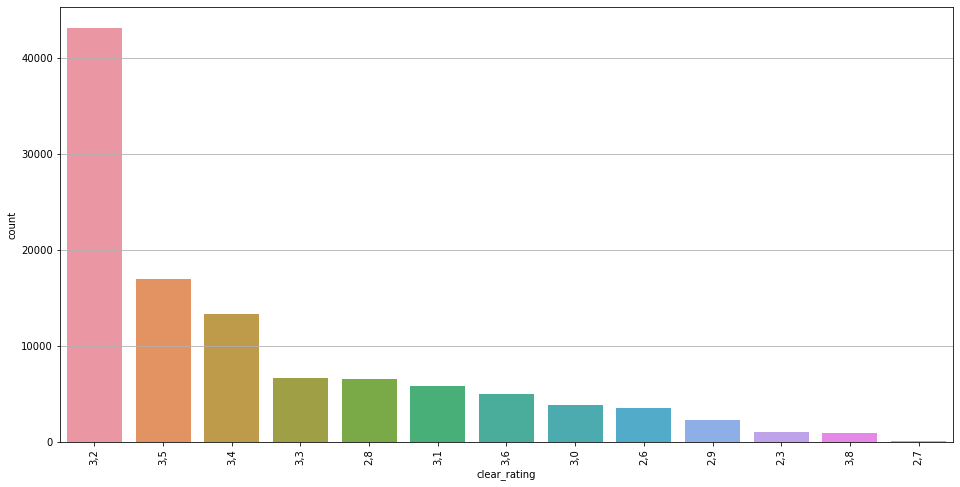

GKH_RATING

2,7: 3958 / 3.63%
2,9: 44522 / 40.8%
3,0: 7079 / 6.49%
3,3: 24562 / 22.51%
2,3: 3682 / 3.37%
2,6: 1963 / 1.8%
2,2: 1019 / 0.93%
2,1: 3205 / 2.94%
2,8: 4222 / 3.87%
3,1: 4064 / 3.72%
3,2: 9128 / 8.36%
2,0: 1025 / 0.94%
3,5: 229 / 0.21%
2,5: 247 / 0.23%
2,4: 226 / 0.21%


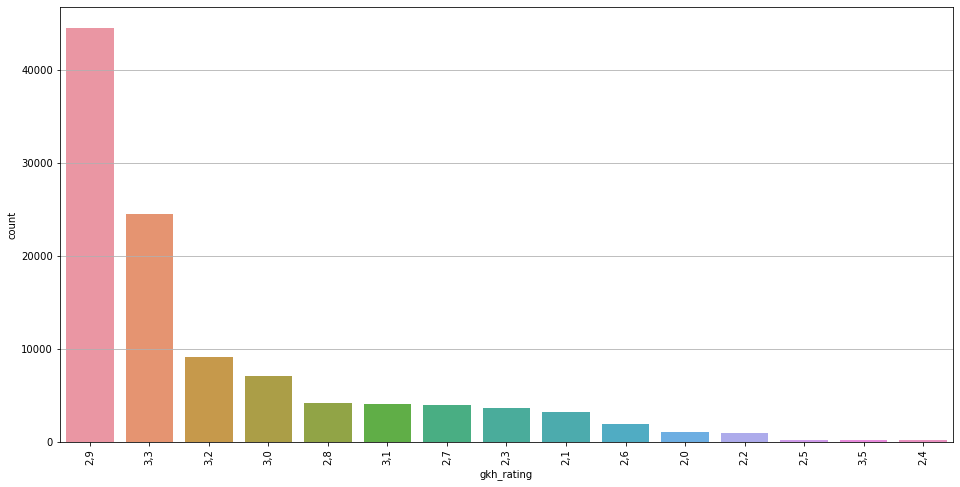

NEIGHBOR_RATING

3,5: 5997 / 5.5%
3,7: 45208 / 41.43%
3,6: 7856 / 7.2%
3,2: 3565 / 3.27%
3,9: 12946 / 11.86%
3,8: 17171 / 15.73%
3,4: 7061 / 6.47%
4,0: 6394 / 5.86%
4,1: 716 / 0.66%
4,3: 1611 / 1.48%
3,3: 606 / 0.56%


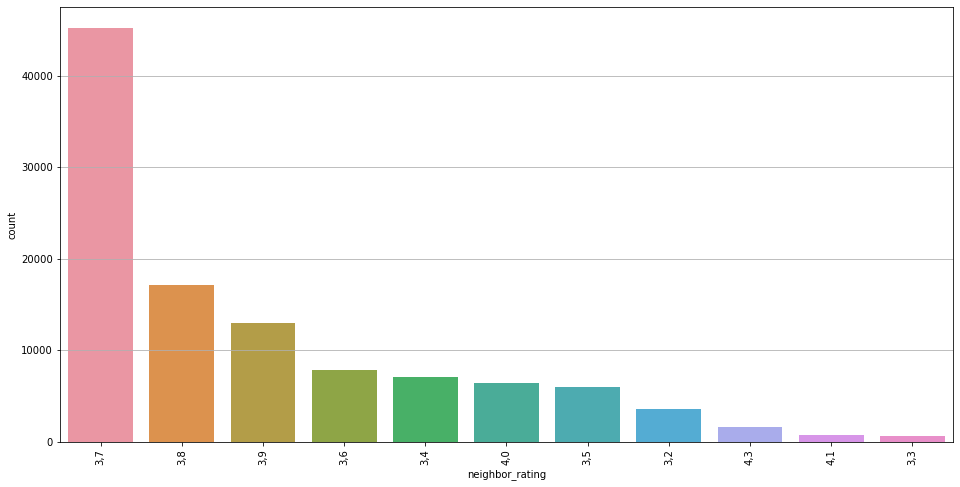

KIDS_RATING

3,8: 55582 / 50.93%
4,1: 6757 / 6.19%
3,7: 3656 / 3.35%
3,9: 19942 / 18.27%
2,3: 1963 / 1.8%
3,4: 5067 / 4.64%
3,5: 2146 / 1.97%
4,0: 7382 / 6.76%
4,5: 574 / 0.53%
4,3: 2685 / 2.46%
4,2: 598 / 0.55%
3,6: 2075 / 1.9%
3,1: 343 / 0.31%
3,3: 188 / 0.17%
4,4: 173 / 0.16%


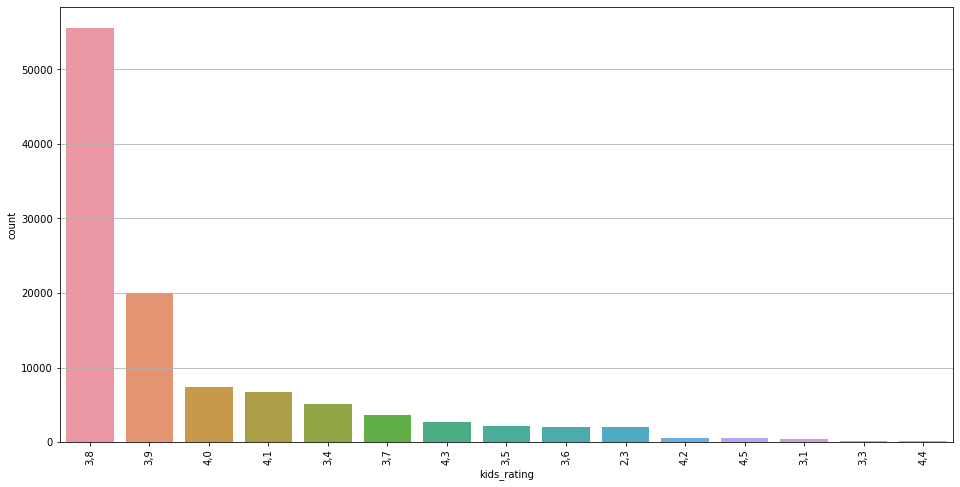

SPORT_REST_RATING

3,5: 47612 / 43.63%
3,7: 17776 / 16.29%
3,8: 8909 / 8.16%
2,4: 3565 / 3.27%
2,1: 1963 / 1.8%
3,1: 3530 / 3.23%
2,8: 1207 / 1.11%
3,2: 4486 / 4.11%
2,7: 600 / 0.55%
3,9: 3110 / 2.85%
3,6: 5390 / 4.94%
3,3: 2462 / 2.26%
2,9: 2636 / 2.42%
4,0: 952 / 0.87%
3,4: 3514 / 3.22%
4,1: 1076 / 0.99%
3,0: 343 / 0.31%


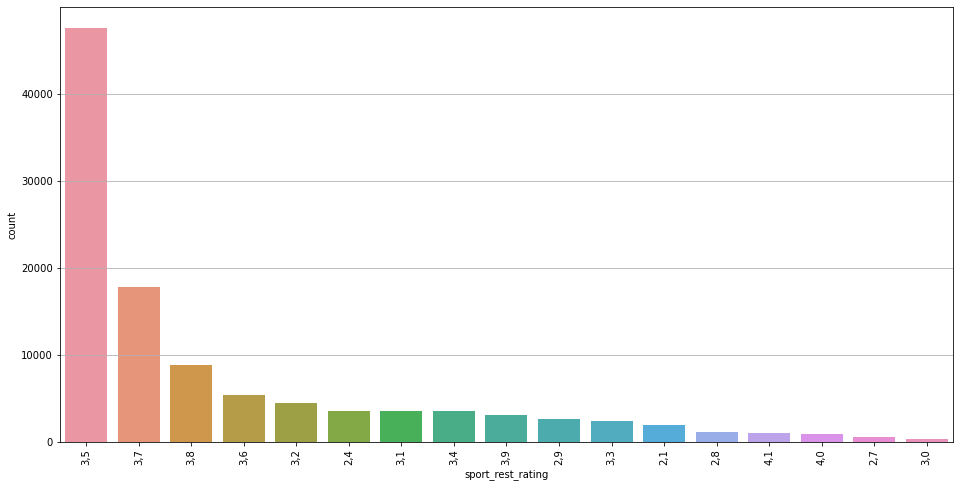

SHOP_RATING

4,3: 53420 / 48.95%
4,4: 7312 / 6.7%
3,5: 4590 / 4.21%
4,5: 19629 / 17.99%
4,6: 5128 / 4.7%
4,2: 7760 / 7.11%
4,0: 2499 / 2.29%
3,8: 2446 / 2.24%
4,1: 3742 / 3.43%
3,3: 2605 / 2.39%


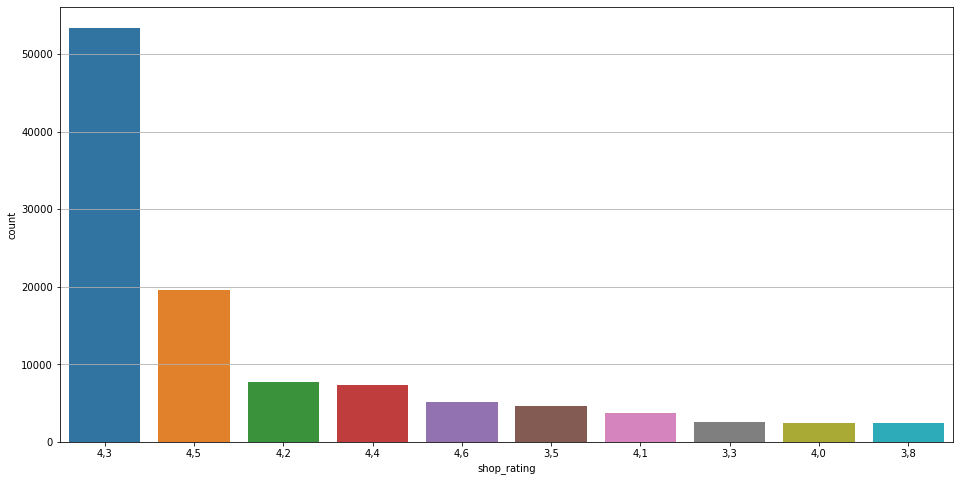

TRAFFIC_RATING

3,1: 12639 / 11.58%
3,2: 45500 / 41.69%
2,9: 7633 / 6.99%
2,6: 6309 / 5.78%
3,3: 16138 / 14.79%
2,4: 1963 / 1.8%
3,5: 8733 / 8.0%
3,7: 3271 / 3.0%
2,8: 859 / 0.79%
3,4: 1333 / 1.22%
3,8: 574 / 0.53%
2,7: 965 / 0.88%
3,0: 3062 / 2.81%
3,6: 152 / 0.14%


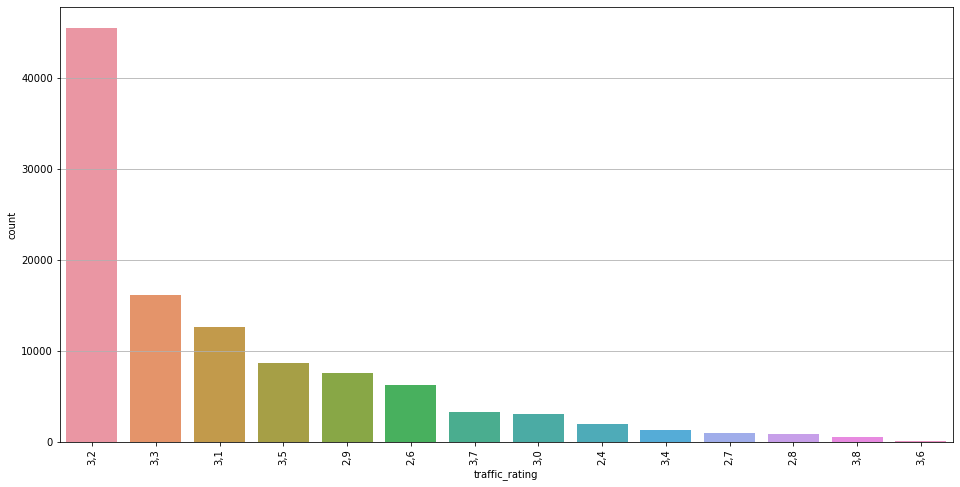

SECURE_RATING

3,0: 6497 / 5.95%
3,4: 49439 / 45.3%
3,7: 8993 / 8.24%
2,9: 4049 / 3.71%
3,8: 16618 / 15.23%
3,3: 3522 / 3.23%
3,9: 4039 / 3.7%
3,6: 6286 / 5.76%
4,2: 574 / 0.53%
3,5: 1991 / 1.82%
2,8: 423 / 0.39%
3,2: 3275 / 3.0%
4,0: 2529 / 2.32%
3,1: 708 / 0.65%
2,6: 188 / 0.17%


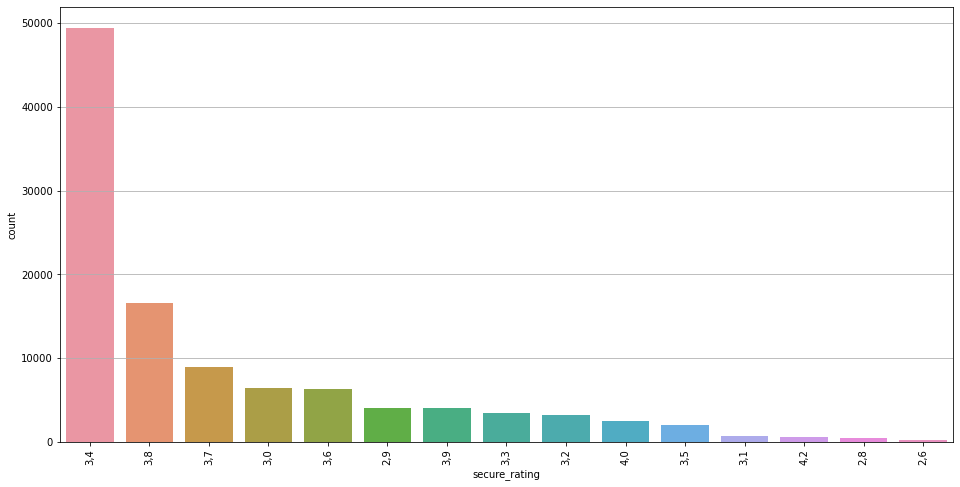

LIFE_PRICE_RATING

2,4: 11120 / 10.19%
2,5: 49461 / 45.32%
2,7: 9028 / 8.27%
1,8: 3565 / 3.27%
2,8: 17716 / 16.23%
2,6: 7406 / 6.79%
2,2: 1587 / 1.45%
2,9: 3216 / 2.95%
3,1: 2529 / 2.32%
2,3: 3199 / 2.93%
2,1: 304 / 0.28%


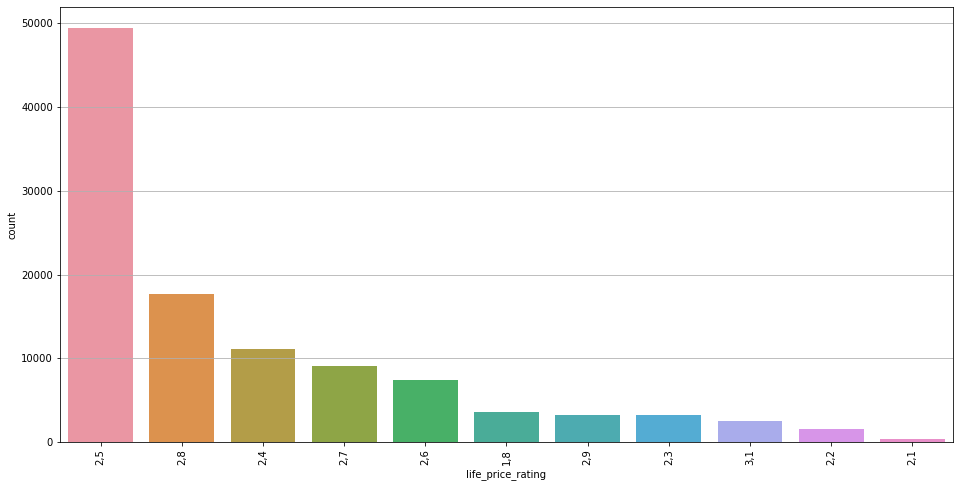

TOTAL_FLOORS

26: 2403 / 2.2%
5: 6811 / 6.24%
23: 3779 / 3.46%
19: 1901 / 1.74%
13: 8031 / 7.36%
7: 1659 / 1.52%
17: 4333 / 3.97%
24: 6789 / 6.22%
18: 4560 / 4.18%
14: 6291 / 5.76%
9: 6757 / 6.19%
4: 3538 / 3.24%
16: 6557 / 6.01%
8: 4802 / 4.4%
22: 2446 / 2.24%
6: 2050 / 1.88%
12: 8413 / 7.71%
27: 756 / 0.69%
10: 3925 / 3.6%
15: 5220 / 4.78%
20: 4129 / 3.78%
25: 8035 / 7.36%
11: 3022 / 2.77%
21: 1173 / 1.07%
29: 361 / 0.33%
2: 302 / 0.28%
3: 717 / 0.66%
34: 3 / 0.0%
35: 26 / 0.02%
28: 277 / 0.25%
32: 32 / 0.03%
1: 10 / 0.01%
36: 9 / 0.01%
30: 10 / 0.01%
33: 3 / 0.0%
31: 1 / 0.0%


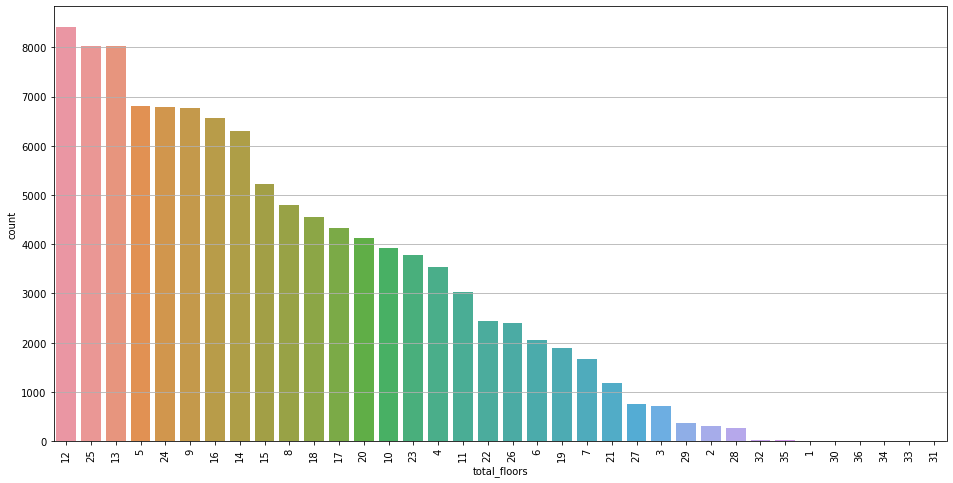

METRO_STATION

Улица Дыбенко: 2383 / 2.18%
Звенигородская: 173 / 0.16%
Елизаровская: 5026 / 4.61%
Пионерская: 1543 / 1.41%
Обухово: 805 / 0.74%
Петроградская: 787 / 0.72%
Площадь Ленина: 1248 / 1.14%
Пролетарская: 3609 / 3.31%
Комендантский проспект: 11182 / 10.25%
Лен. область: 4794 / 4.39%
Звездная: 4947 / 4.53%
Гражданский проспект: 3092 / 2.83%
Шувалово: 188 / 0.17%
Лесная: 4426 / 4.06%
Чернышевская: 796 / 0.73%
Парнас: 7034 / 6.45%
Площадь Восстания: 584 / 0.54%
Ломоносовская: 681 / 0.62%
Ладожская: 1624 / 1.49%
Московская: 1659 / 1.52%
Сергиево (Володарская): 2676 / 2.45%
Крестовский остров: 2070 / 1.9%
Парк Победы: 505 / 0.46%
Новочеркасская: 1768 / 1.62%
Сосновая Поляна: 3041 / 2.79%
Василеостровская: 975 / 0.89%
Нарвская: 755 / 0.69%
Удельная: 1251 / 1.15%
Выборгская: 606 / 0.56%
Чкаловская: 1299 / 1.19%
Балтийская: 1689 / 1.55%
Международная: 517 / 0.47%
Владимирская: 269 / 0.25%
Приморская: 4311 / 3.95%
Автово: 332 / 0.3%
Черная речка: 3056 / 2.8%
Рыбацкое: 544 / 0.5%
Старая

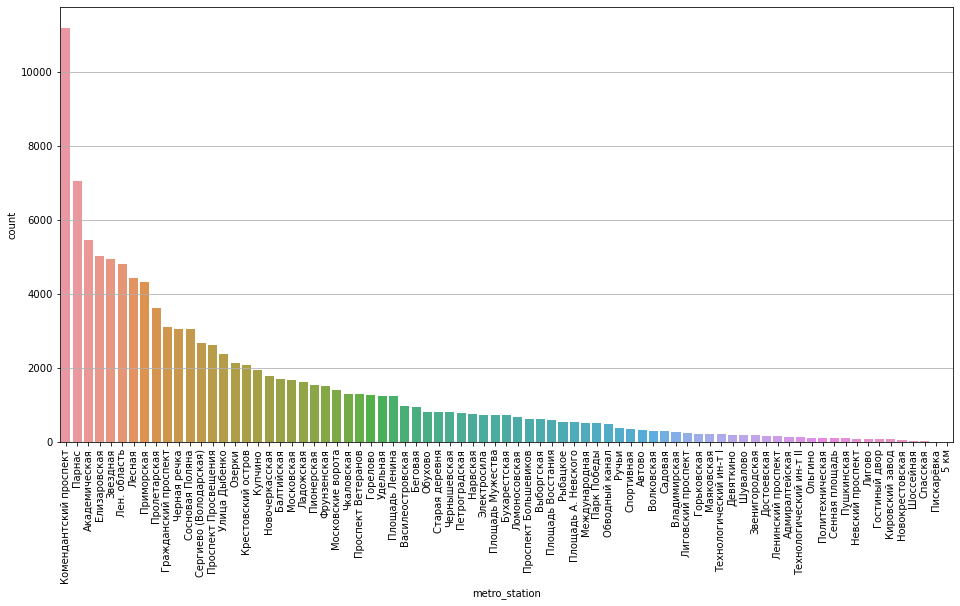

UNDERGROUND

1000 - 2000: 29372 / 26.91%
0 - 1000: 30861 / 28.28%
2000 - 3000: 14924 / 13.68%
3000 - 4000: 16957 / 15.54%
4000 - 5000: 12223 / 11.2%
> 5000: 4794 / 4.39%


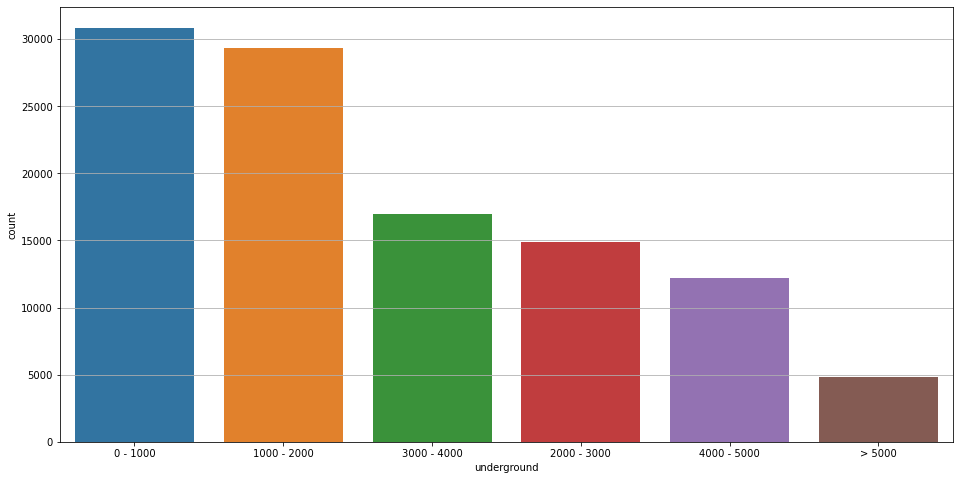

In [39]:
cat_visualization(df, cat_features)

**flat_type** - Больше всего объявлений о продаже квартир, на втором месте студии. Жилое помещение с свободной планировкой очень мало относительно всего объема данных. Удалю их.

**rooms** - Объявлений с 7, 8, 9 комнатами и свободной планировкой ~200. Меньше 1% относительно всего объема данных. Нет смысла с ними возиться. Удаляем. Объявления с одной комнатой могут быть как квартирами так и студиями. Взглянем на соотношение.

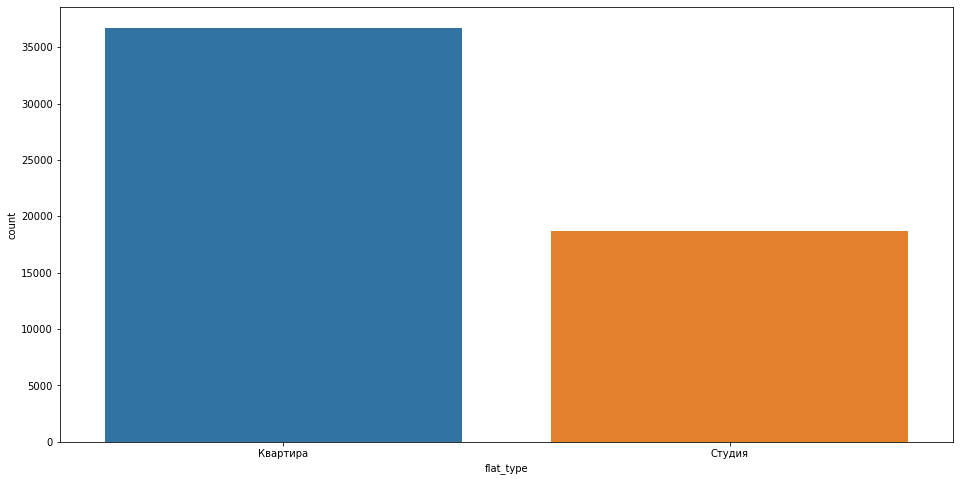

In [40]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(df['flat_type'][df['rooms']=='1'])
plt.show()

Однокомнатных квартир в два раза больше чем студий.

**floors** - Объявлений квартиры которых расположены на 26-33 этажах ~100. Удаляем.

**build_matireal** - Блоки и дерево ~300. Удаляем.

**district** - Колпинский, Всеволожский, Петродворцовый, Пушкинский районы находятся на чертой города, без доступа к метро. Объявлений в Всеволожском, Петродворцовом района в сумме меньше 1%. Возможно стоит попробвать объеденить их в одну категорию "Лен. область".

**total_floors** - Объявлений с общим количеством этажей 1, 30, 31, 32, 33, 34, 35, 36 в сумме меньше 1%. Удаляем.

**metro_station** - 5км и Пискаревка. Таких станций метро нет. Всего 3 объявления. Удаляем.

## barplot

**Посмотрим на связь категориальных признаков и таргета.**

In [41]:
def target_cat_rel(df, cat_features):
    
    """ Отношение категориальных признаков к таргету. """

    for cat in cat_features:
    
        fig = plt.figure(figsize=(16, 8))
        plt.xticks(rotation=90)
        sns.barplot(x=cat, y='price', data=df, order=df.groupby([cat]).mean().sort_values('price', ascending=False).index)
        plt.show()

In [42]:
cat_features = ['flat_type', 'object_type', 'rooms', 'floors',
                'build_matireal', 'district', 'total_floors', 
                'metro_station', 'underground'] 

In [71]:
# Удаляем все выше перечисленные категории.
# flat_type - Своб. планировка.
df_correct = df.drop(df[df['flat_type'] == 'Своб. планировка'].index)
# rooms - Своб. планировка, 7, 8, 9.
df_correct.drop(df_correct[(df_correct['rooms'] == 'Своб. планировка') | (df_correct['rooms'] == '7') | \
                   (df_correct['rooms'] == '8') | (df_correct['rooms'] == '9')].index, inplace=True)
# floors - 26 - 35.
df_correct.drop(df_correct[(df_correct['floors'] == '26') | (df_correct['floors'] == '27') | \
                   (df_correct['floors'] == '28') | (df_correct['floors'] == '29') | \
                   (df_correct['floors'] == '30') | (df_correct['floors'] == '31') | \
                   (df_correct['floors'] == '32') | (df_correct['floors'] == '33') | \
                   (df_correct['floors'] == '34') | (df_correct['floors'] == '35')].index, inplace=True)
# build_matireal - блоки, дерево.
df_correct.drop(df_correct[(df_correct['build_matireal'] == 'Блоки') | \
                           (df_correct['build_matireal'] == 'Дерево')].index, inplace=True)
# total_floors - 1, 30 - 36.
df_correct.drop(df_correct[(df_correct['total_floors'] == '1') | (df_correct['total_floors'] == '30') | \
                   (df_correct['total_floors'] == '31') | (df_correct['total_floors'] == '32') | \
                   (df_correct['total_floors'] == '33') | (df_correct['total_floors'] == '34') | \
                   (df_correct['total_floors'] == '35') | (df_correct['total_floors'] == '36')].index, inplace=True)
# metro_station - 5км, Пискаревка.
df_correct.drop(df_correct[(df_correct['metro_station'] == '5 км') | \
                           (df_correct['metro_station'] == 'Пискарёвка')].index, inplace=True)

In [76]:
df.shape

(109131, 29)

In [72]:
df_correct.shape

(108048, 29)

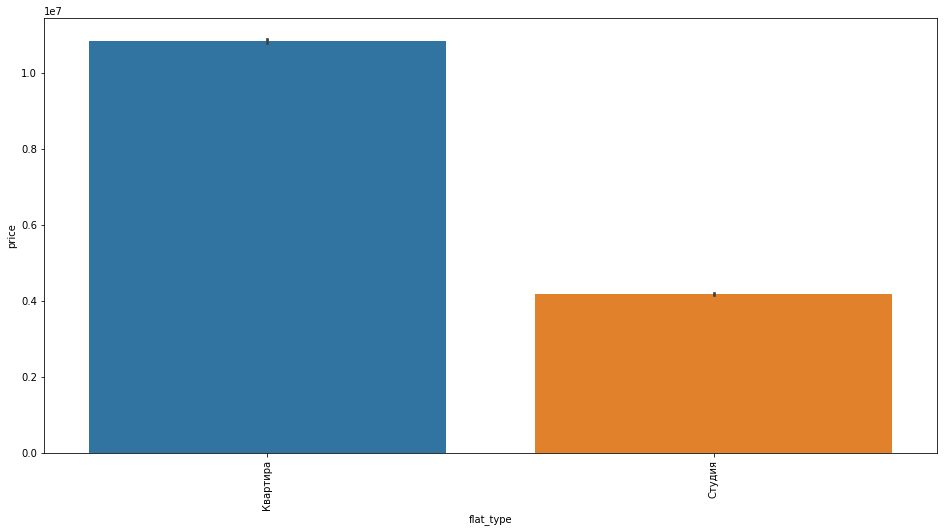

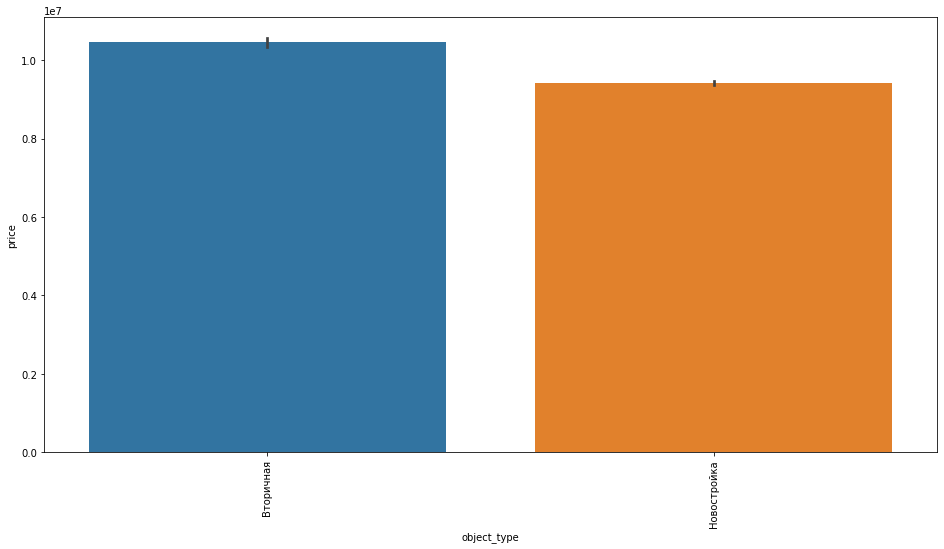

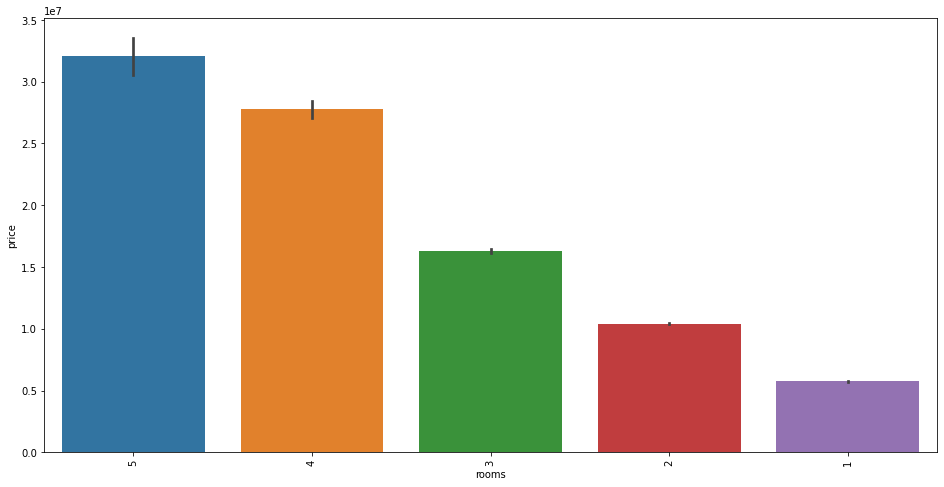

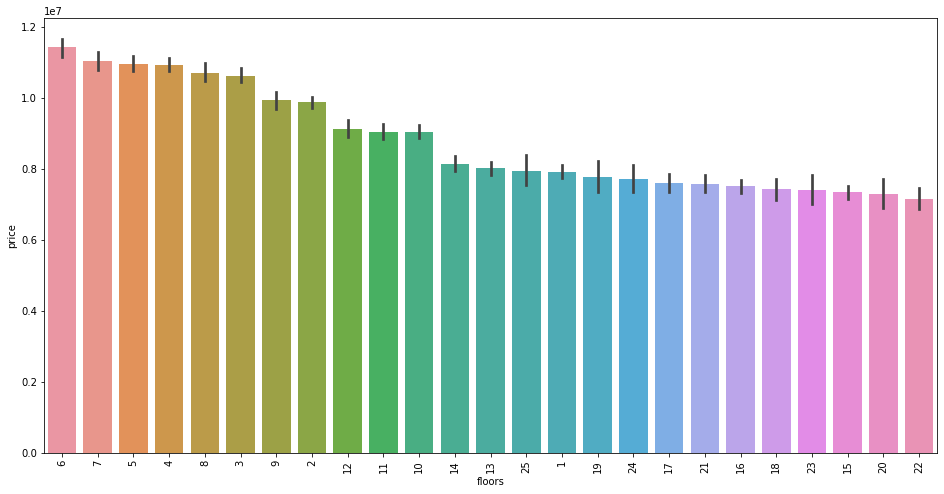

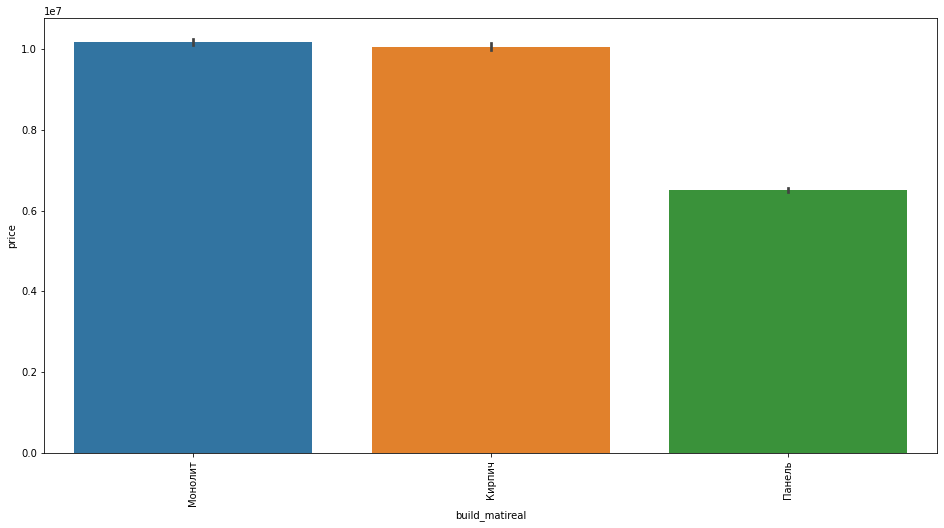

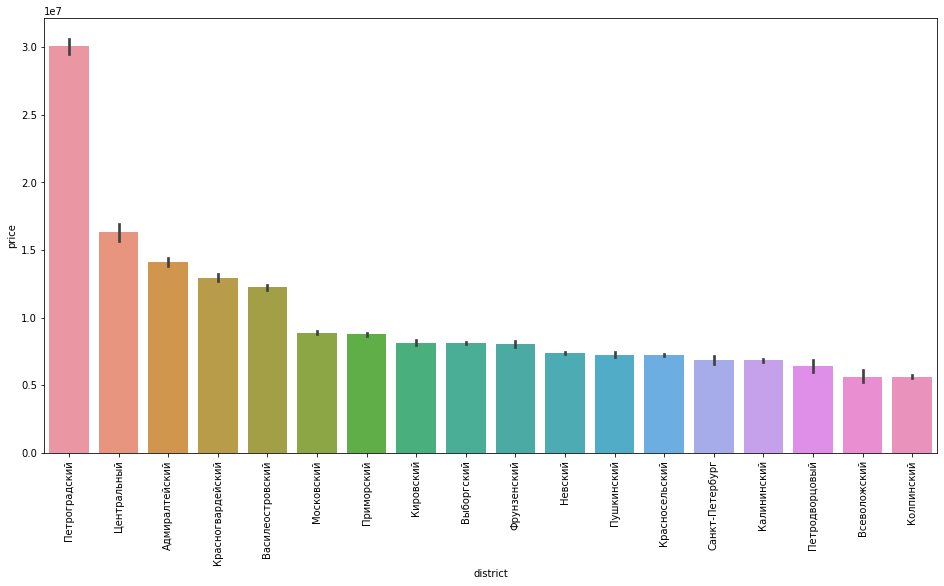

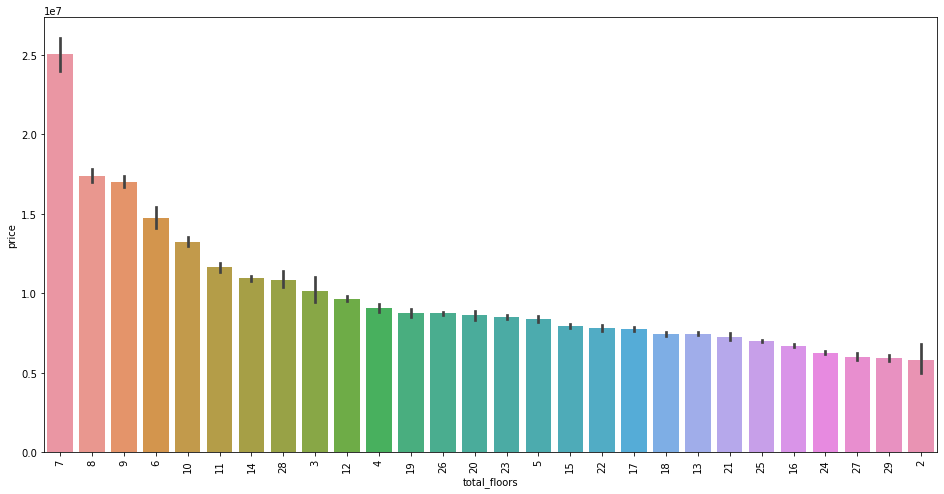

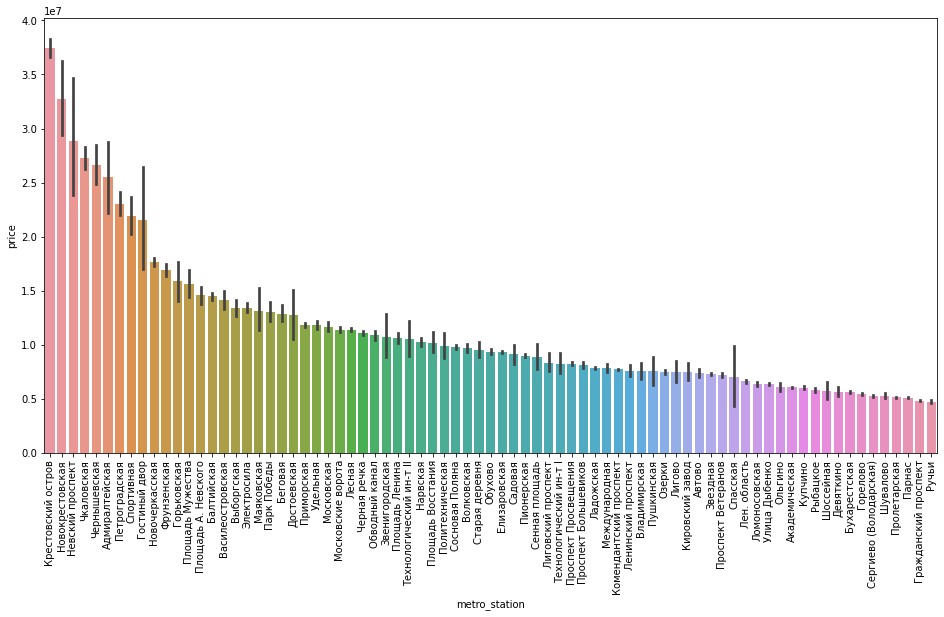

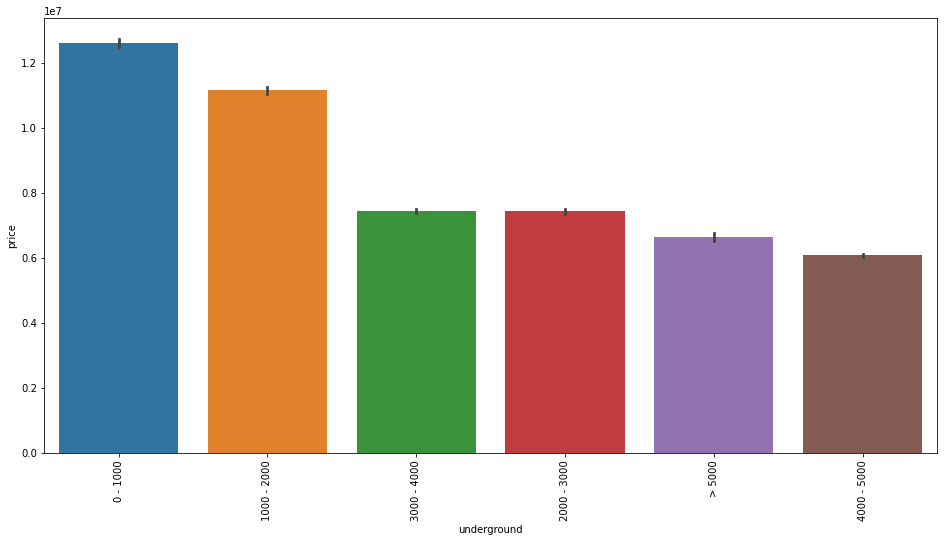

In [75]:
target_cat_rel(df_correct[(df_correct['square']<401) & (df_correct['price']<100000000)], cat_features)

Здесь все достаточно логично, аномалий не наблюдается.

# Naive model

Построю наивную модель, которая предсказывает среднюю цену по количеству комнат и району. Это будет модель, с которой можно будет сравнивать последующие.

In [108]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [127]:
# split данных. Данные которые изначально помечены как тестовые в модели не участвуют.
df_train, df_test = train_test_split(df[df['sample'] == 1], test_size=0.15, shuffle=True, random_state=42)

predicts = []
for index, row in pd.DataFrame(df_test[['rooms', 'district']]).iterrows():
    query = f"rooms == '{row[0]}' and district == '{row[1]}'"
    predicts.append(df_train.query(query)['price'].median())

# заполняем не найденные совпадения
predicts = pd.DataFrame(predicts)
predicts = predicts.fillna(predicts.median())

print(f"Наивная модель MAPE: {(mape(df_test['price'], predicts.values[:, 0]))*100:0.2f}%") 

Наивная модель MAPE: 27.74%


# Выводы

## Ручной EDA

**Признаки.**

Всего **29** признаков, включая таргет. Из них **24** категориальных и **5** числовых.

**Пропуски.**

Пропуски имеются всего лишь в двух признаках `kitchen_square` и `live_sqaure`. В обоих случаях пропущенно > 50% данных. Можно попробовать несколько вариантов решения данной проблемы:
- `kitchen_square` и `live_sqaure` по сути своей являются частью признака `square`, поэтому как вариант можно просто удалить эти два признака.
- Во всех объявлениях данные пропущены по разному, где-то нет `kitchen_square`, а где-то `live_sqaure`. В признаке `square` пропусков нет, поэтому можно попробовать вычеслить недостающие данные, используя два других признака, т.е. вычесть из `square` имеющийся признак и получить недостающий.
- Использовать в данном случае базове приемы, такие как заполнение средним, медианой или модой считаю не целесообразным, но можно вычеслить сколько в среднем, в процентом соотношении занимает каждая площадь и на основе этих данных заполнить пропуски.

**Выбросы.**

Без предворительной фильтрации есть несколько явных выбросов. Либо слишком большая цена при прочих вводных, либо слшиком болльшая площадь. От этих данных предлагаю просто избавится, так как их < 10. При таком объеме данных (> 100000 объявлений) мы ничего не потеряем, но если их оставить они могут оказать влияние на качество модели.

Оставшиеся данные предлагаю поделить на два этапа:

- Оставить объявления с площадью до 400 м2.
- Оставить объявления с площадью до 130 м2.

**Новые признаки.**

На основе данных о районе можно добавить новые признаки из внешних источников, например кол-во школ, поликлиник и т.д.

**Имеющиеся признаки.**

Имеет смысл сократить количество категорий в некоторых категориальных признаках (`flat_type`, `rooms`, `floors`, `build_matireals`, `total_floors`, `metro_station`), так как есть категории в которых слишком мало строк ( <10) и относительно всего объема данных это очень маленький процент.

## Pandas profiling